# **1. Project Name**    - Appliance Energy Prediction



##### **Project Type**    - Regression
##### 
#####  - Nikhil Arvind Arjune
##### 


# **3. GitHub Link -**


https://github.com/NikhilArjune/Assessment-Project-Appliance-Energy-Prediction.git

# **4. Problem Statement**


**The data set is at 10 min for about 4.5 months. The house temperature and humidity conditions were monitored with a ZigBee wireless sensor network. Each wireless node transmitted the temperature and humidity conditions around 3.3 min. Then, the wireless data was averaged for 10 minutes. The energy data was logged every 10 minutes with m-bus energy metres. Weather from the nearest airport weather station (Chievres Airport Belgium) was downloaded from a public data set from Reliable Prognosis (rp5.ru) and merged together with the experimental data sets using the date and time column. Two random variables have been included in the data set for testing the regression models and to filter out non-predictive attributes. You need to predict the energy use of appliances.**

# **5. Introduction to Data**

### 5.1 Importing  Libraries and Dataframe

In [81]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [82]:
#  Creating variable to store file path
file_path = r'C:\Users\Nicks\Desktop\project\data_application_energy (1).csv'

In [83]:
# Creating a Dataframe
df = pd.read_csv(file_path)

# 5.2 Data Inspection

In [84]:
# Top 5 rows of  Dataset
df.head()

date  Appliances  lights     T1       RH_1    T2       RH_2  \
0  2016-01-11 17:00:00          60      30  19.89  47.596667  19.2  44.790000   
1  2016-01-11 17:10:00          60      30  19.89  46.693333  19.2  44.722500   
2  2016-01-11 17:20:00          50      30  19.89  46.300000  19.2  44.626667   
3  2016-01-11 17:30:00          50      40  19.89  46.066667  19.2  44.590000   
4  2016-01-11 17:40:00          60      40  19.89  46.333333  19.2  44.530000   

      T3       RH_3         T4  ...         T9   RH_9     T_out  Press_mm_hg  \
0  19.79  44.730000  19.000000  ...  17.033333  45.53  6.600000        733.5   
1  19.79  44.790000  19.000000  ...  17.066667  45.56  6.483333        733.6   
2  19.79  44.933333  18.926667  ...  17.000000  45.50  6.366667        733.7   
3  19.79  45.000000  18.890000  ...  17.000000  45.40  6.250000        733.8   
4  19.79  45.000000  18.890000  ...  17.000000  45.40  6.133333        733.9   

   RH_out  Windspeed  Visibility  Tdewpoint        rv1        rv2  
0    92.0   7.000000   63.000000        5.3  13.275433  13.275433  
1    92.0   6.666667   59.166667        5.2  18.606195  18.606195  
2    92.0   6.333333   55.333333        5.1  28.642668  28.642668  
3    92.0   6.000000   51.500000        5.0  45.410389  45.410389  
4    92.0   5.666667   47.666667        4.9  10.084097  10.084097  

[5 rows x 29 columns]

In [85]:
# Last 5 rows of Dataset
df.tail()

date  Appliances  lights         T1       RH_1  \
19730  2016-05-27 17:20:00         100       0  25.566667  46.560000   
19731  2016-05-27 17:30:00          90       0  25.500000  46.500000   
19732  2016-05-27 17:40:00         270      10  25.500000  46.596667   
19733  2016-05-27 17:50:00         420      10  25.500000  46.990000   
19734  2016-05-27 18:00:00         430      10  25.500000  46.600000   

              T2       RH_2         T3       RH_3    T4  ...    T9     RH_9  \
19730  25.890000  42.025714  27.200000  41.163333  24.7  ...  23.2  46.7900   
19731  25.754000  42.080000  27.133333  41.223333  24.7  ...  23.2  46.7900   
19732  25.628571  42.768571  27.050000  41.690000  24.7  ...  23.2  46.7900   
19733  25.414000  43.036000  26.890000  41.290000  24.7  ...  23.2  46.8175   
19734  25.264286  42.971429  26.823333  41.156667  24.7  ...  23.2  46.8450   

           T_out  Press_mm_hg     RH_out  Windspeed  Visibility  Tdewpoint  \
19730  22.733333        755.2  55.666667   3.333333   23.666667  13.333333   
19731  22.600000        755.2  56.000000   3.500000   24.500000  13.300000   
19732  22.466667        755.2  56.333333   3.666667   25.333333  13.266667   
19733  22.333333        755.2  56.666667   3.833333   26.166667  13.233333   
19734  22.200000        755.2  57.000000   4.000000   27.000000  13.200000   

             rv1        rv2  
19730  43.096812  43.096812  
19731  49.282940  49.282940  
19732  29.199117  29.199117  
19733   6.322784   6.322784  
19734  34.118851  34.118851  

[5 rows x 29 columns]

In [86]:
# Dataset Rows & Columns count
df.shape

(19735, 29)

In [87]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [88]:
# Dataset Duplicate Value Count

df.duplicated().sum()

0

In [89]:
# Missing Values/Null Values Count
df.isnull().sum()

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

In [90]:
# Dataset Describe
df.describe([0.25,0.75,0.90,0.95,0.99])

Appliances        lights            T1          RH_1            T2  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      97.694958      3.801875     21.686571     40.259739     20.341219   
std      102.524891      7.935988      1.606066      3.979299      2.192974   
min       10.000000      0.000000     16.790000     27.023333     16.100000   
25%       50.000000      0.000000     20.760000     37.333333     18.790000   
50%       60.000000      0.000000     21.600000     39.656667     20.000000   
75%      100.000000      0.000000     22.600000     43.066667     21.500000   
90%      196.000000     20.000000     23.963333     45.700000     23.331200   
95%      330.000000     20.000000     24.726455     47.326667     24.557667   
99%      576.600000     30.000000     25.500000     50.492200     26.952857   
max     1080.000000     70.000000     26.260000     63.360000     29.856667   

               RH_2            T3          RH_3            T4          RH_4  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      40.420420     22.267611     39.242500     20.855335     39.026904   
std        4.069813      2.006111      3.254576      2.042884      4.341321   
min       20.463333     17.200000     28.766667     15.100000     27.660000   
25%       37.900000     20.790000     36.900000     19.530000     35.530000   
50%       40.500000     22.100000     38.530000     20.666667     38.400000   
75%       43.260000     23.290000     41.760000     22.100000     42.156667   
90%       45.227333     25.100000     44.363333     23.790000     45.500000   
95%       46.664333     26.200000     45.090000     24.500000     46.790000   
99%       49.790000     27.133333     46.500000     25.600000     49.200000   
max       56.026667     29.236000     50.163333     26.200000     51.090000   

       ...            T9          RH_9         T_out   Press_mm_hg  \
count  ...  19735.000000  19735.000000  19735.000000  19735.000000   
mean   ...     19.485828     41.552401      7.411665    755.522602   
std    ...      2.014712      4.151497      5.317409      7.399441   
min    ...     14.890000     29.166667     -5.000000    729.300000   
25%    ...     18.000000     38.500000      3.666667    750.933333   
50%    ...     19.390000     40.900000      6.916667    756.100000   
75%    ...     20.600000     44.338095     10.408333    760.933333   
90%    ...     22.700000     47.736000     14.550000    764.833333   
95%    ...     23.200000     49.046929     17.100000    766.600000   
99%    ...     24.100000     50.995259     22.500000    769.700000   
max    ...     24.500000     53.326667     26.100000    772.300000   

             RH_out     Windspeed    Visibility     Tdewpoint           rv1  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      79.750418      4.039752     38.330834      3.760707     24.988033   
std       14.901088      2.451221     11.794719      4.194648     14.496634   
min       24.000000      0.000000      1.000000     -6.600000      0.005322   
25%       70.333333      2.000000     29.000000      0.900000     12.497889   
50%       83.666667      3.666667     40.000000      3.433333     24.897653   
75%       91.666667      5.500000     40.000000      6.566667     37.583769   
90%       95.666667      7.666667     59.266667      9.200000     45.155695   
95%       97.000000      9.000000     62.666667     11.233333     47.533568   
99%       99.000000     10.943333     64.666667     14.050000     49.462361   
max      100.000000     14.000000     66.000000     15.500000     49.996530   

                rv2  
count  19735.000000  
mean      24.988033  
std       14.496634  
min        0.005322  
25%       12.497889  
50%       24.897653  
75%       37.583769  
90%       45.155695  
95%       47.533568  
99%       49.462361  
max       49.996530  

[11 rows x 28 columns]

In [91]:
# Check Unique Values for each variable.
df.nunique()

date           19735
Appliances        92
lights             8
T1               722
RH_1            2547
T2              1650
RH_2            3376
T3              1426
RH_3            2618
T4              1390
RH_4            2987
T5              2263
RH_5            7571
T6              4446
RH_6            9709
T7              1955
RH_7            5891
T8              2228
RH_8            6649
T9               924
RH_9            3388
T_out           1730
Press_mm_hg     2189
RH_out           566
Windspeed        189
Visibility       413
Tdewpoint       1409
rv1            19735
rv2            19735
dtype: int64

# 5.3 Dataset Features Information




#### Date: day, on which reading were recorded ###
#### Appliances: Energy use in Wh (Dependent Variable) ###
#### lights: Number of Lights present ###
#### T1: Temperature in kitchen area in Celsius ###
#### T2: Temperature in living room area in Celsius ###
#### T3: Temperature in laundry room area in Celsius ###
#### T4:Temperature in office room, in Celsius ###
#### T5:Temperature in bathroom, in Celsius ###
#### T6:Temperature outside the building (north side), in Celsius ###
#### T7:Temperature in ironing room , in Celsius ###
#### T8:Temperature in teenager room 2, in Celsius ###
#### T9:Temperature in parents room, in Celsius ###
#### RH1:Humidity in kitchen area, in % ###
#### RH2:Humidity in living room area, in % ###
#### RH3:Humidity in laundry room area, in % ###
#### RH4:Humidity in office room, in % ###
#### RHS:Humidity in bathroom, in % ###
#### RH6:Humidity outside the building (north side), in % ###
#### RH7:Humidity in ironing room, in % ###
#### RH8:Humidity in teenager room 2, in % ###
#### RH9:Humidity in parents room, in % ###
#### T_out:Temperature outside (from Chievres weather station), in Celsius ###
#### Press_mm_hg:(from Chievres weather station), in mm Hg ###
#### RH_out:Humidity outside (from Chievres weather station), in % ###
#### Wind speed:(from Chievres weather station), in m/s ###
#### Visibility:(from Chievres weather station), in km ###
#### Tdewpoint:(from Chievres weather station), A. t ###
#### rv1:Appliances, energy use in Wh (Dependent Variable) ###
#### rv2:Appliances, energy use in Wh  ( Dependent Variable) ###


In [92]:
#all columns from dataset
df.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

## 6. ***Data Wrangling***

### 6.1 Data Wrangling Code

In [93]:
# Convert the date column to a datetime object
df['date'] = pd.to_datetime(df['date'])

# Extract the Year, Month, Day, and Hour from the date column
df['Year'] = df['date'].dt.year
df['Month'] = df['date'].dt.month
df['Day'] = df['date'].dt.day
df['Hour'] = df['date'].dt.hour
#df['day_of_week'] = df['date'].dt.strftime('%A')

# Drop the original date column
df = df.drop(columns=['date'])

# cheking Newly created column
df.head()

Appliances  lights     T1       RH_1    T2       RH_2     T3       RH_3  \
0          60      30  19.89  47.596667  19.2  44.790000  19.79  44.730000   
1          60      30  19.89  46.693333  19.2  44.722500  19.79  44.790000   
2          50      30  19.89  46.300000  19.2  44.626667  19.79  44.933333   
3          50      40  19.89  46.066667  19.2  44.590000  19.79  45.000000   
4          60      40  19.89  46.333333  19.2  44.530000  19.79  45.000000   

          T4       RH_4  ...  RH_out  Windspeed  Visibility  Tdewpoint  \
0  19.000000  45.566667  ...    92.0   7.000000   63.000000        5.3   
1  19.000000  45.992500  ...    92.0   6.666667   59.166667        5.2   
2  18.926667  45.890000  ...    92.0   6.333333   55.333333        5.1   
3  18.890000  45.723333  ...    92.0   6.000000   51.500000        5.0   
4  18.890000  45.530000  ...    92.0   5.666667   47.666667        4.9   

         rv1        rv2  Year  Month  Day  Hour  
0  13.275433  13.275433  2016      1   11    17  
1  18.606195  18.606195  2016      1   11    17  
2  28.642668  28.642668  2016      1   11    17  
3  45.410389  45.410389  2016      1   11    17  
4  10.084097  10.084097  2016      1   11    17  

[5 rows x 32 columns]

In [94]:
# Cheking every columns properties
df.describe()

Appliances        lights            T1          RH_1            T2  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      97.694958      3.801875     21.686571     40.259739     20.341219   
std      102.524891      7.935988      1.606066      3.979299      2.192974   
min       10.000000      0.000000     16.790000     27.023333     16.100000   
25%       50.000000      0.000000     20.760000     37.333333     18.790000   
50%       60.000000      0.000000     21.600000     39.656667     20.000000   
75%      100.000000      0.000000     22.600000     43.066667     21.500000   
max     1080.000000     70.000000     26.260000     63.360000     29.856667   

               RH_2            T3          RH_3            T4          RH_4  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      40.420420     22.267611     39.242500     20.855335     39.026904   
std        4.069813      2.006111      3.254576      2.042884      4.341321   
min       20.463333     17.200000     28.766667     15.100000     27.660000   
25%       37.900000     20.790000     36.900000     19.530000     35.530000   
50%       40.500000     22.100000     38.530000     20.666667     38.400000   
75%       43.260000     23.290000     41.760000     22.100000     42.156667   
max       56.026667     29.236000     50.163333     26.200000     51.090000   

       ...        RH_out     Windspeed    Visibility     Tdewpoint  \
count  ...  19735.000000  19735.000000  19735.000000  19735.000000   
mean   ...     79.750418      4.039752     38.330834      3.760707   
std    ...     14.901088      2.451221     11.794719      4.194648   
min    ...     24.000000      0.000000      1.000000     -6.600000   
25%    ...     70.333333      2.000000     29.000000      0.900000   
50%    ...     83.666667      3.666667     40.000000      3.433333   
75%    ...     91.666667      5.500000     40.000000      6.566667   
max    ...    100.000000     14.000000     66.000000     15.500000   

                rv1           rv2     Year         Month           Day  \
count  19735.000000  19735.000000  19735.0  19735.000000  19735.000000   
mean      24.988033     24.988033   2016.0      3.101647     16.057411   
std       14.496634     14.496634      0.0      1.339200      8.450998   
min        0.005322      0.005322   2016.0      1.000000      1.000000   
25%       12.497889     12.497889   2016.0      2.000000      9.000000   
50%       24.897653     24.897653   2016.0      3.000000     16.000000   
75%       37.583769     37.583769   2016.0      4.000000     23.000000   
max       49.996530     49.996530   2016.0      5.000000     31.000000   

               Hour  
count  19735.000000  
mean      11.502002  
std        6.921953  
min        0.000000  
25%        6.000000  
50%       12.000000  
75%       17.000000  
max       23.000000  

[8 rows x 32 columns]

In [95]:
##In df.describe() we found that both columns rv1 and rv2 are identical with all parameters it shows, cross veryfying again if rv1 and rv2 columns are equal
print(df['rv1'].equals(df['rv2']))

True


In [96]:
#now that we foound found both are identical, we are dropping rv2 column
df=df.drop('rv2',axis=1)

In [97]:
#year column has standard deviation of 0. It means no information gain.
#droping "Year" column from df

df=df.drop("Year",axis=1)

In [98]:
#checking df after droping rv2 and Year column
df.head()

Appliances  lights     T1       RH_1    T2       RH_2     T3       RH_3  \
0          60      30  19.89  47.596667  19.2  44.790000  19.79  44.730000   
1          60      30  19.89  46.693333  19.2  44.722500  19.79  44.790000   
2          50      30  19.89  46.300000  19.2  44.626667  19.79  44.933333   
3          50      40  19.89  46.066667  19.2  44.590000  19.79  45.000000   
4          60      40  19.89  46.333333  19.2  44.530000  19.79  45.000000   

          T4       RH_4  ...     T_out  Press_mm_hg  RH_out  Windspeed  \
0  19.000000  45.566667  ...  6.600000        733.5    92.0   7.000000   
1  19.000000  45.992500  ...  6.483333        733.6    92.0   6.666667   
2  18.926667  45.890000  ...  6.366667        733.7    92.0   6.333333   
3  18.890000  45.723333  ...  6.250000        733.8    92.0   6.000000   
4  18.890000  45.530000  ...  6.133333        733.9    92.0   5.666667   

   Visibility  Tdewpoint        rv1  Month  Day  Hour  
0   63.000000        5.3  13.275433      1   11    17  
1   59.166667        5.2  18.606195      1   11    17  
2   55.333333        5.1  28.642668      1   11    17  
3   51.500000        5.0  45.410389      1   11    17  
4   47.666667        4.9  10.084097      1   11    17  

[5 rows x 30 columns]

In [99]:
# creating a copy of dataframe
df_avg=df.copy()

In [100]:
#creating new temperature and humidity variables based on inside , outside and near weather station temperature and humidity
#As observe buliding inside temp is near about same. So we are creating new variable call temp_inside_building_avg, in which we are taking Mean of all temperature readings of rooms inside bulding
df_avg["temp_inside_building_avg"]=(df_avg["T1"]+df_avg["T2"]+df_avg["T3"]+df_avg["T4"]+df_avg["T5"]+df_avg["T7"]+df_avg["T8"]+df_avg["T9"])/8

#Also same observe for buliding inside humidity. So we are creating new variable call humidity_inside_building_avg, in which we are taking Mean of all Humidity readings of rooms inside bulding
df_avg["humidity_inside building_avg"]=(df_avg["RH_1"]+df_avg["RH_2"]+df_avg["RH_3"]+df_avg["RH_4"]+df_avg["RH_5"]+df_avg["RH_7"]+df_avg["RH_8"]+df_avg["RH_9"])/8

#Renaming columns showing outside building and outside weather station readings
df_avg=df_avg.rename(columns={'T6':'Temp_outside','RH_6':'Humidity_outside','To':"Temp_outside_weather_station",'Hg RHout':'Humidity_outside_weather_station' })

#droping columns T1,T2,T3,T4,T5,T7,T8,T9,RH1,RH2,RH3,RH4,RH5,RH7,RH8,RH9
df_avg=df_avg.drop(['T1','T2','T3','T4','T5','T7','T8','T9','RH_1','RH_2','RH_3','RH_4','RH_5','RH_7','RH_8','RH_9'],axis=1)

In [101]:
# Cheking new changes done on  Dataframe
df_avg.head()

Appliances  lights  Temp_outside  Humidity_outside     T_out  Press_mm_hg  \
0          60      30      7.026667         84.256667  6.600000        733.5   
1          60      30      6.833333         84.063333  6.483333        733.6   
2          50      30      6.560000         83.156667  6.366667        733.7   
3          50      40      6.433333         83.423333  6.250000        733.8   
4          60      40      6.366667         84.893333  6.133333        733.9   

   RH_out  Windspeed  Visibility  Tdewpoint        rv1  Month  Day  Hour  \
0    92.0   7.000000   63.000000        5.3  13.275433      1   11    17   
1    92.0   6.666667   59.166667        5.2  18.606195      1   11    17   
2    92.0   6.333333   55.333333        5.1  28.642668      1   11    17   
3    92.0   6.000000   51.500000        5.0  45.410389      1   11    17   
4    92.0   5.666667   47.666667        4.9  10.084097      1   11    17   

   temp_inside_building_avg  humidity_inside building_avg  
0                 18.435000                     46.742500  
1                 18.439167                     46.672708  
2                 18.421667                     46.562917  
3                 18.396250                     46.468750  
4                 18.408750                     46.462917

# **7. Visualisation**

## 7.1  Univariate Analysis

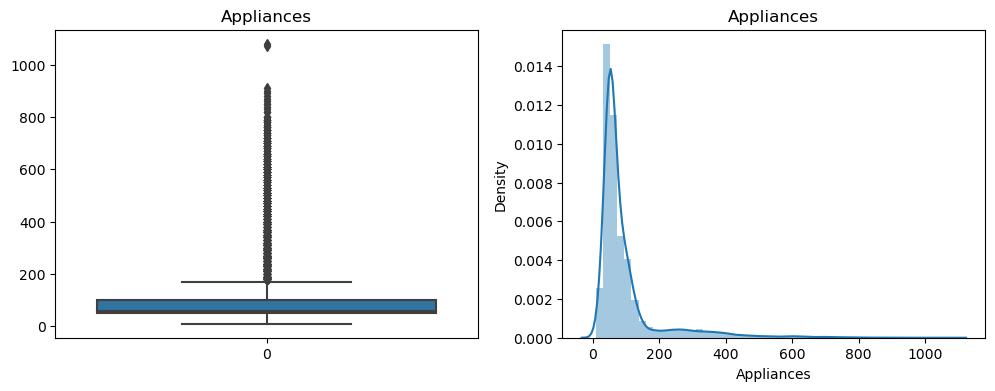

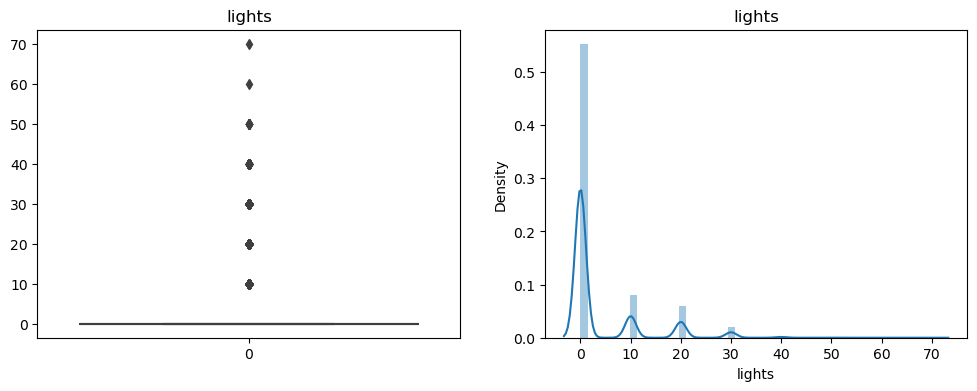

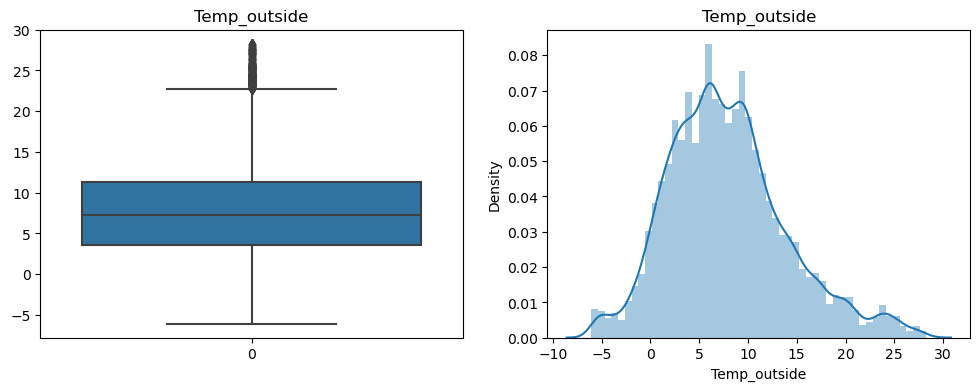

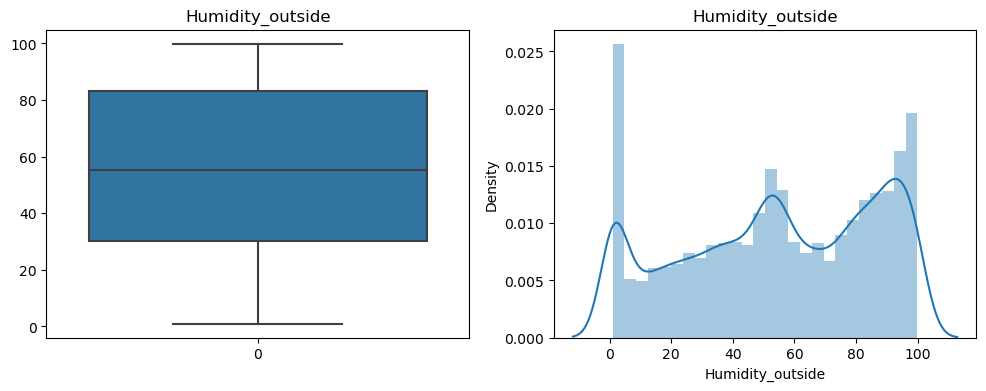

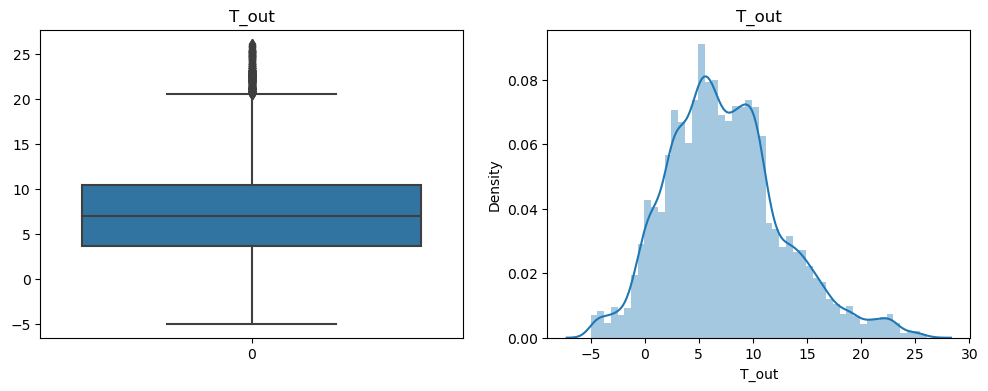

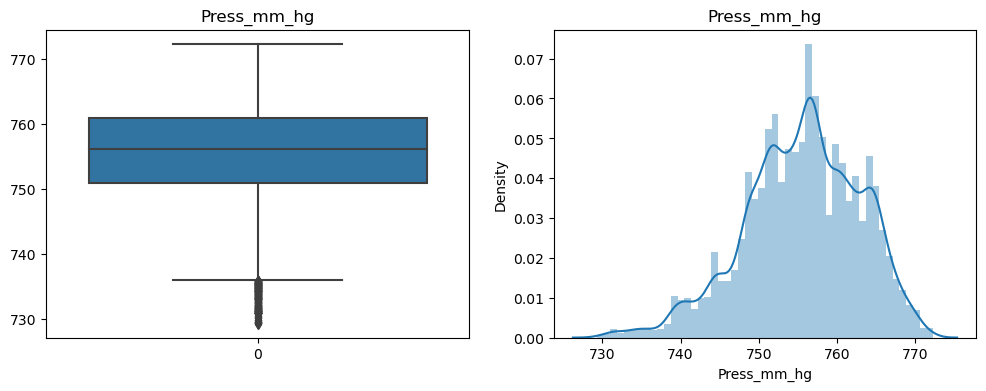

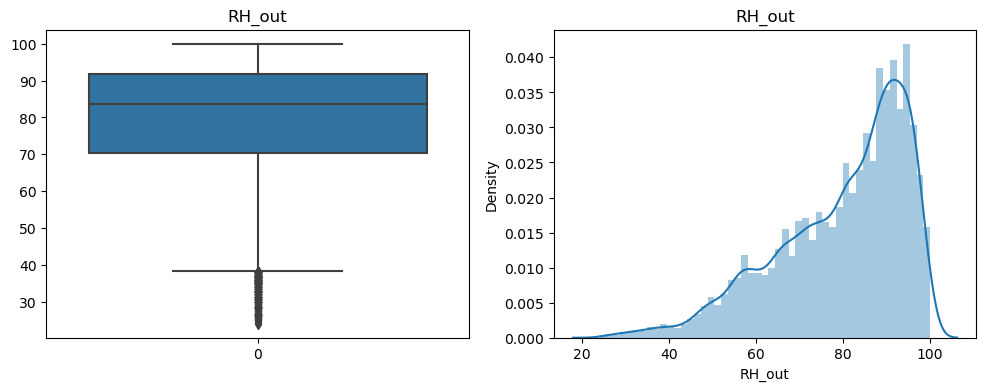

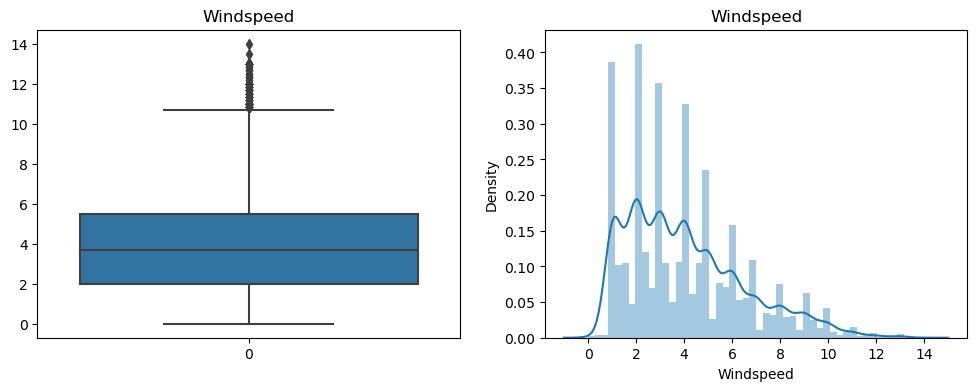

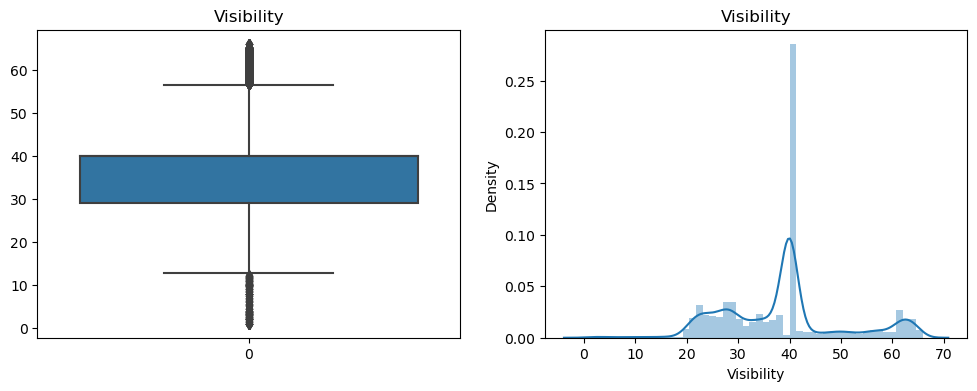

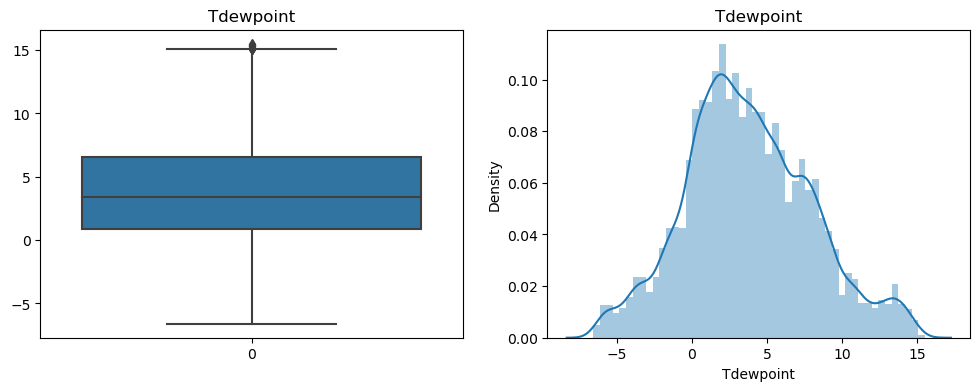

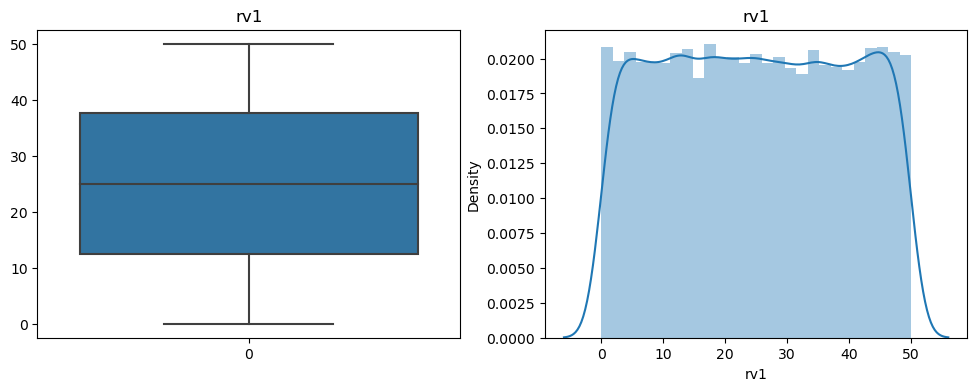

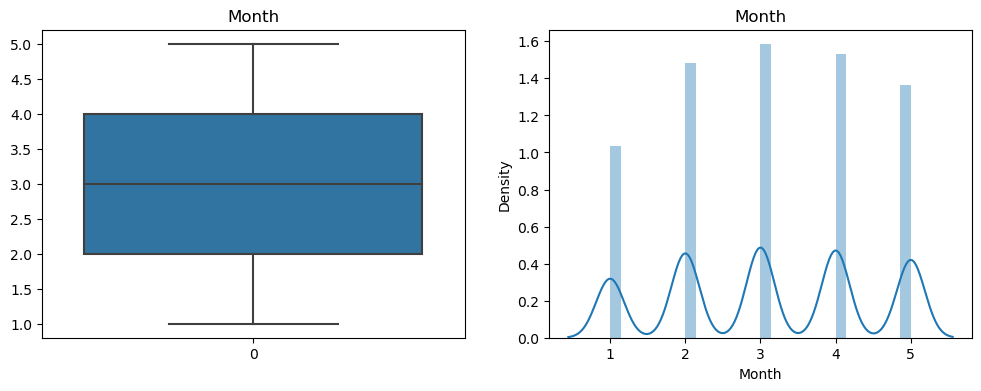

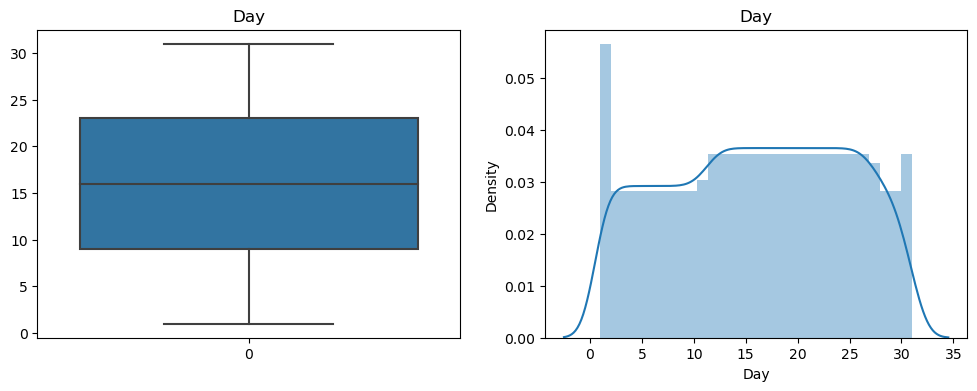

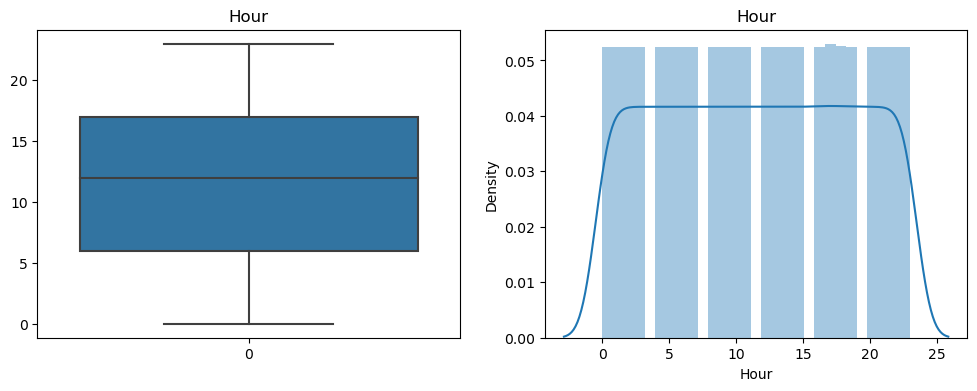

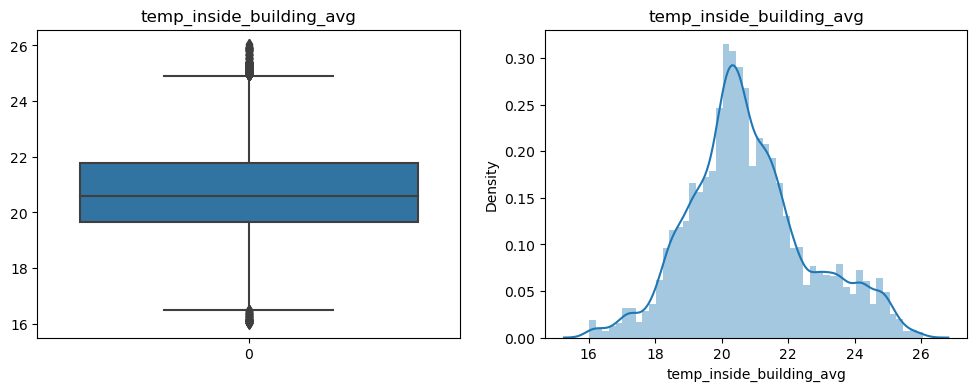

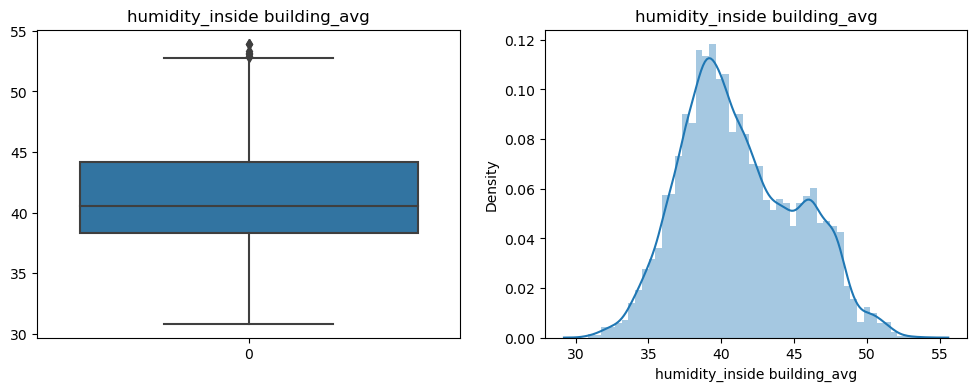

In [102]:
# Perform Univariate Analysis on modified dataframe df_avg
for col in df_avg.columns:
  #poltting boxplot
    plt.figure(figsize=(12,4))
    plt.subplot(1, 2, 1)
    fig = sns.boxplot(df_avg[col])
    fig.set_title(col)
  #Plotting displot
    plt.subplot(1, 2, 2)
    fig = sns.distplot(df_avg[col])
    fig.set_title(col)
plt.show()

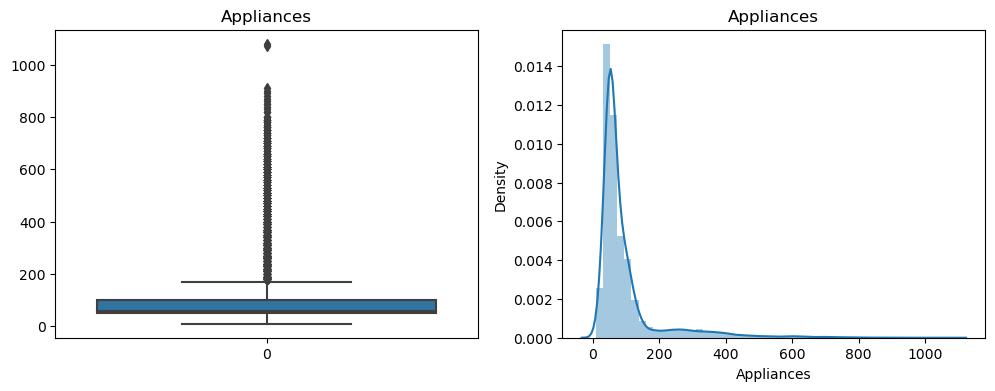

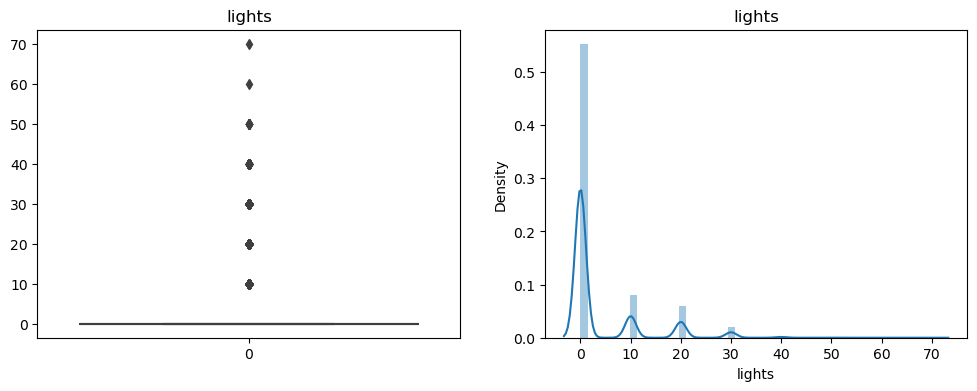

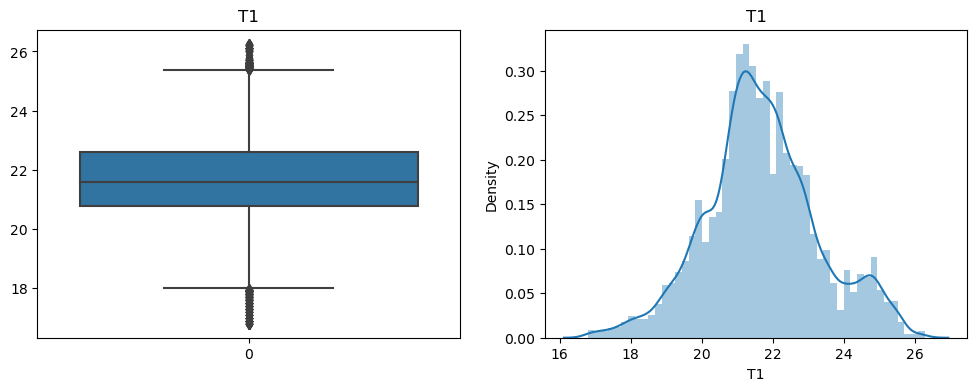

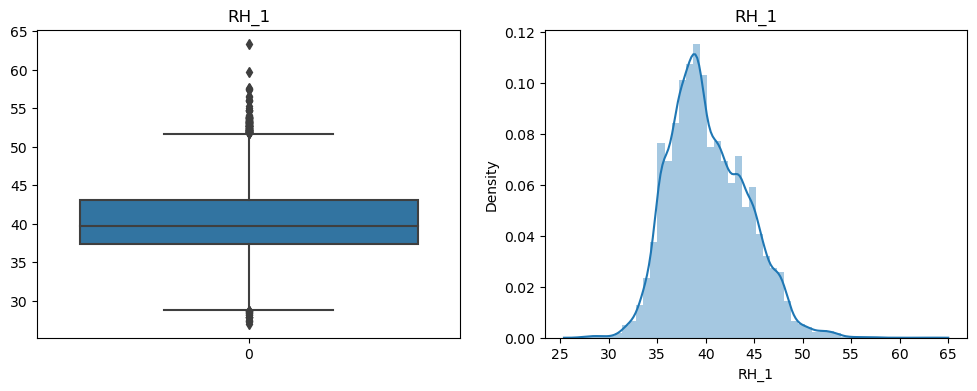

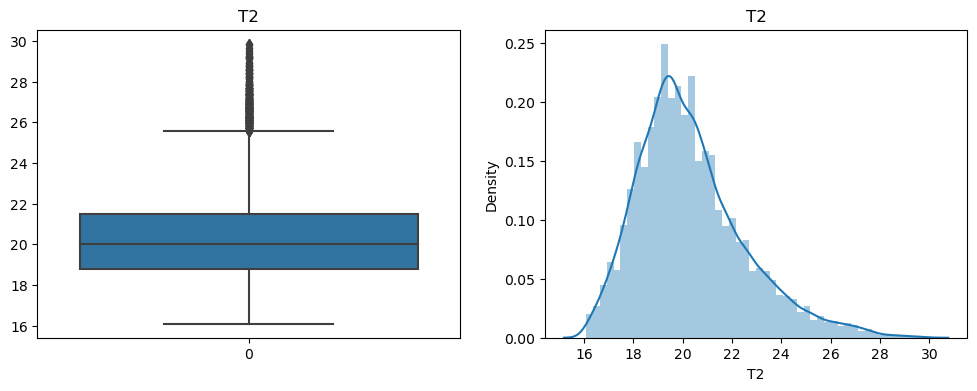

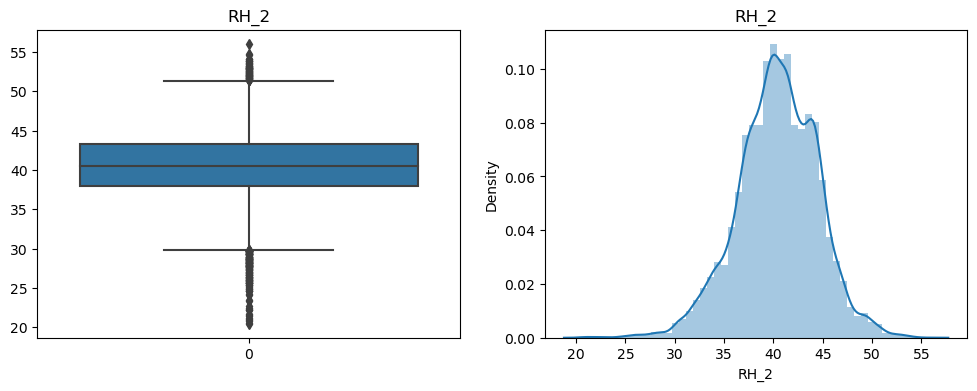

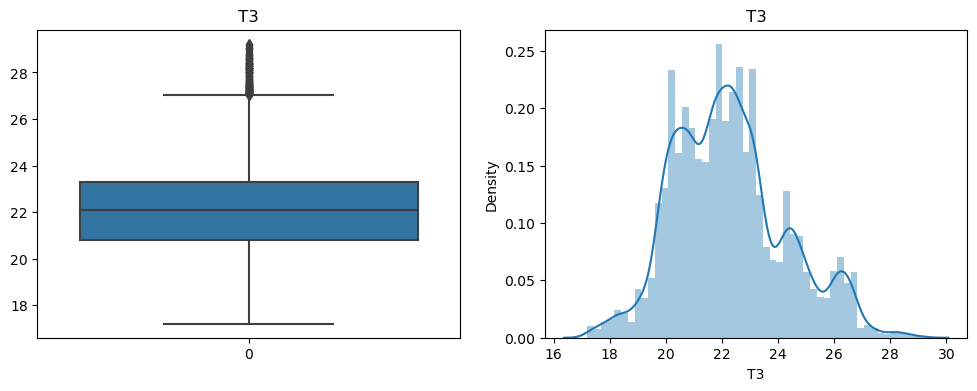

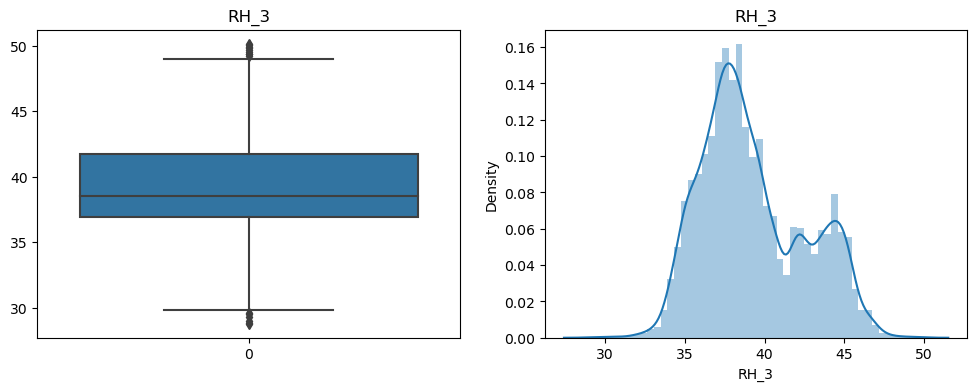

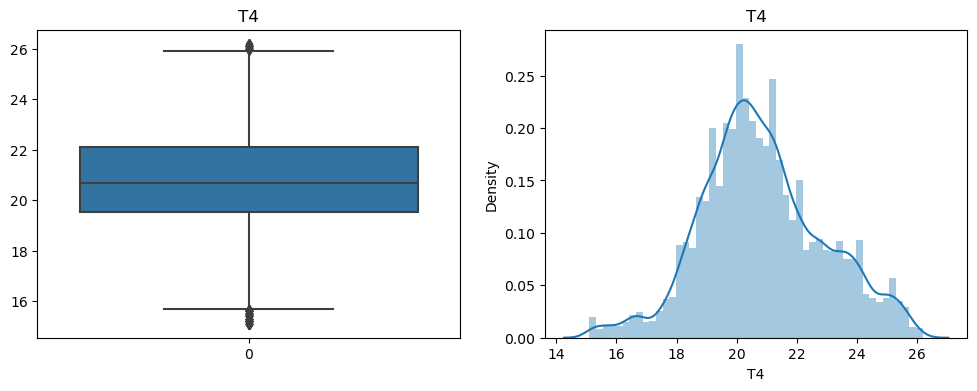

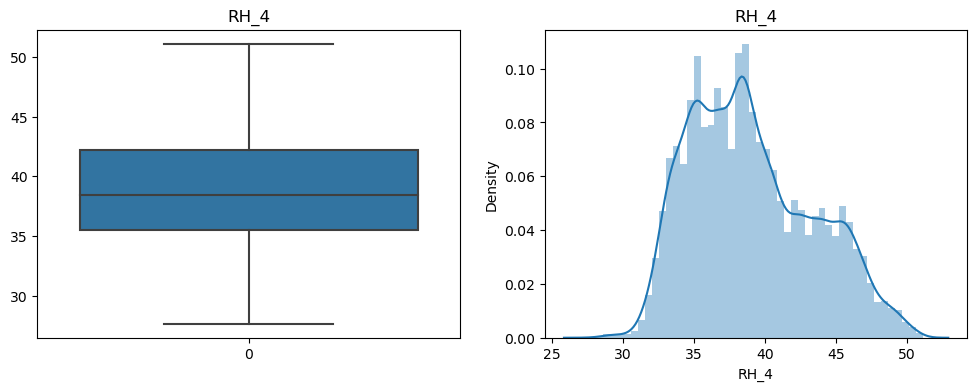

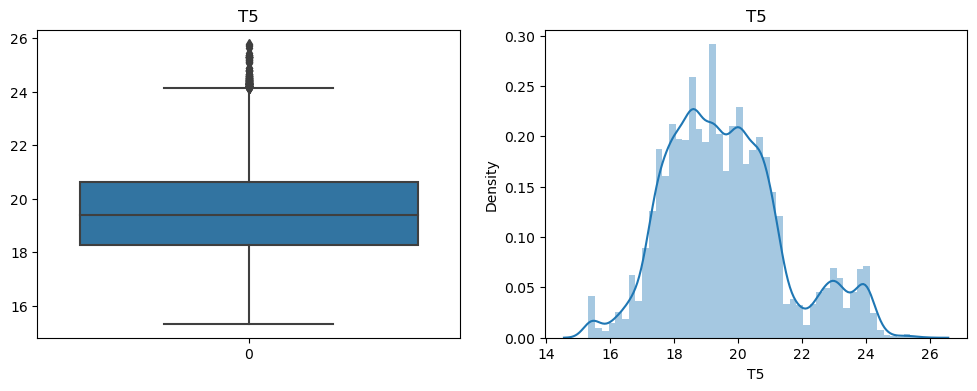

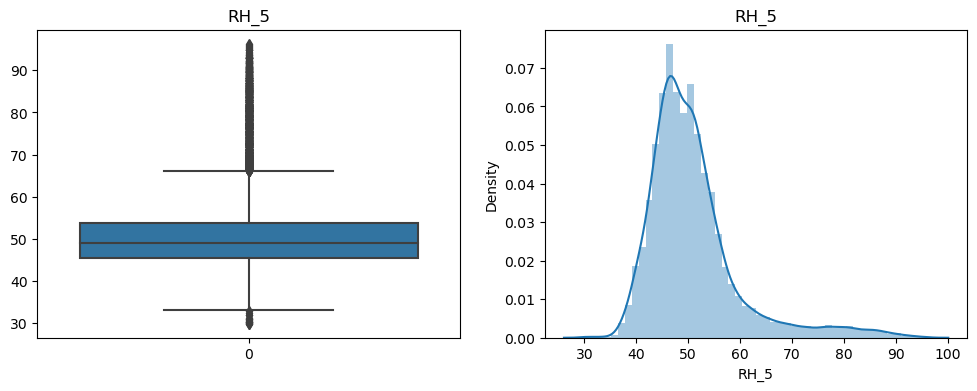

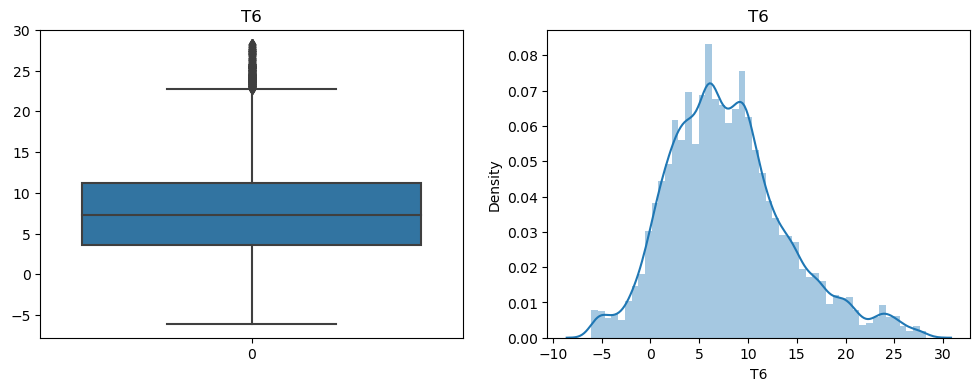

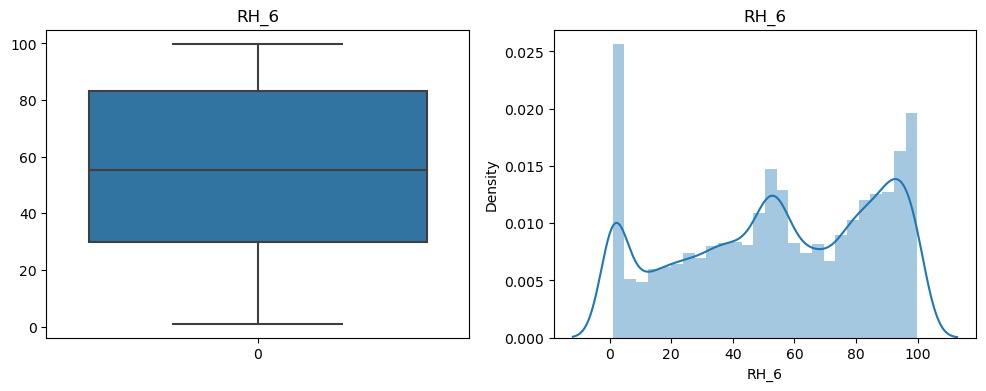

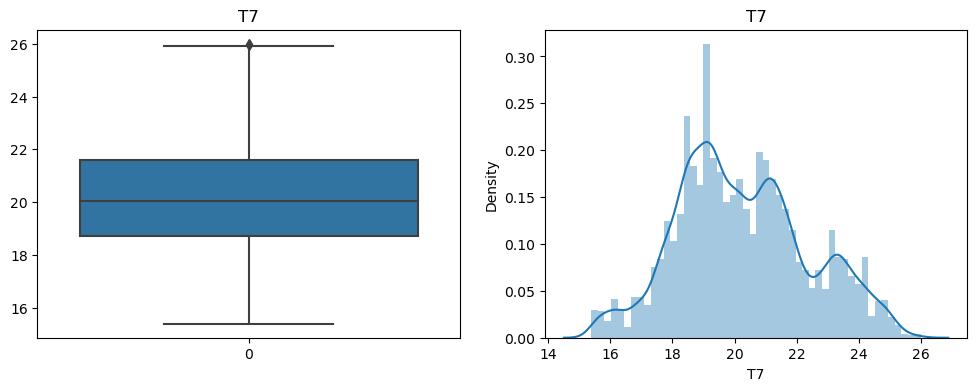

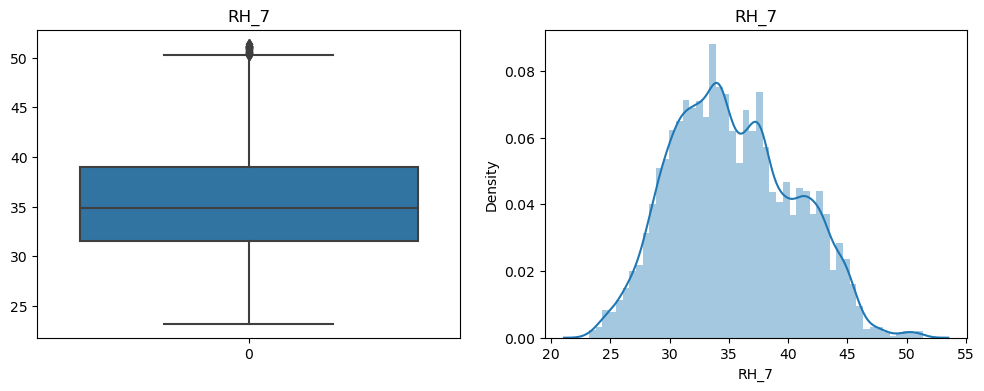

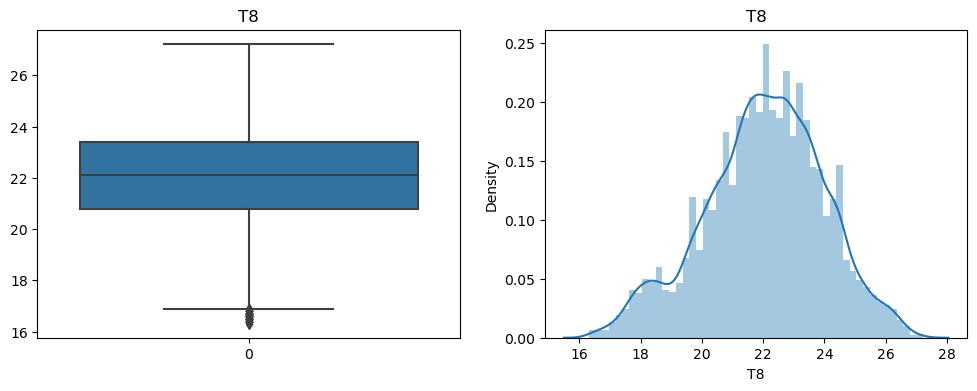

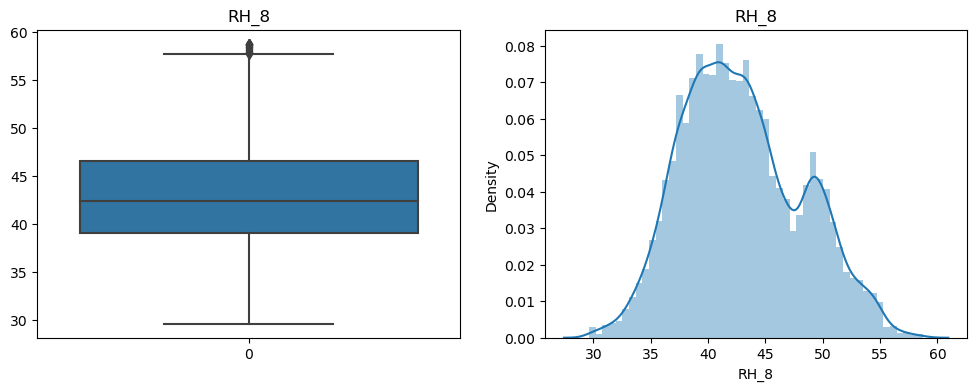

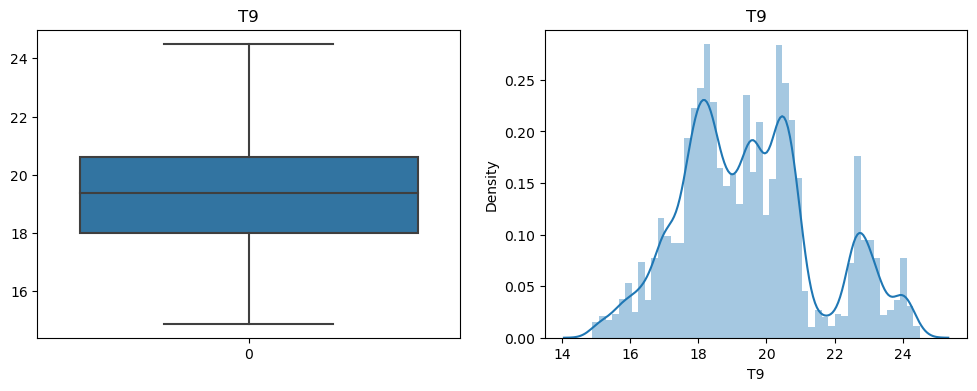

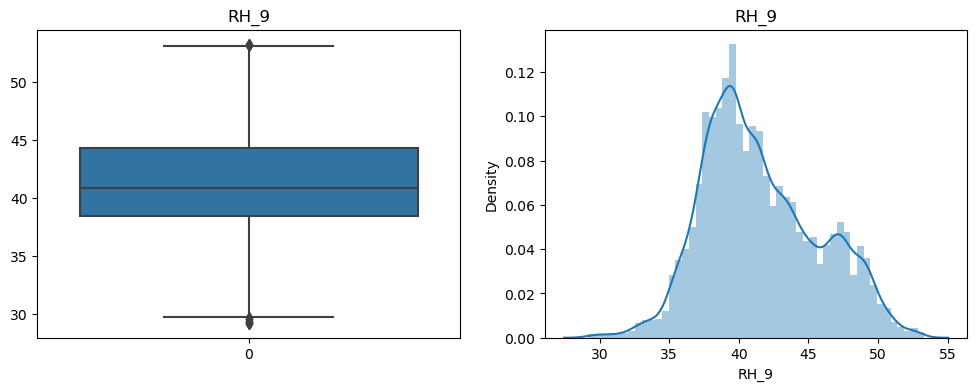

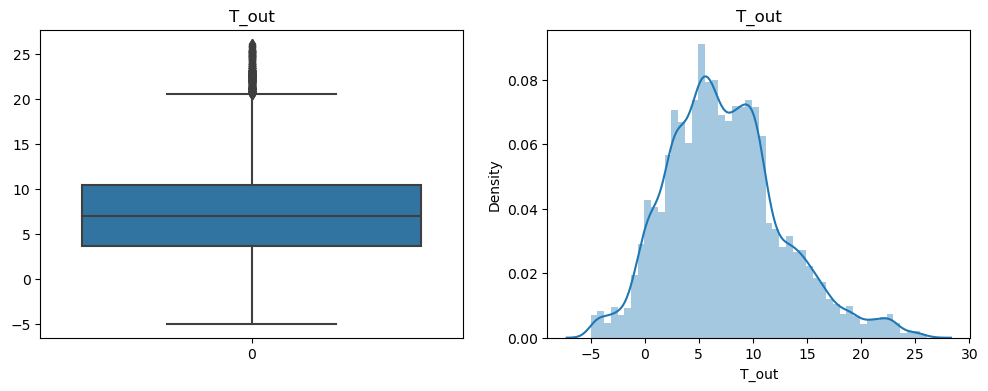

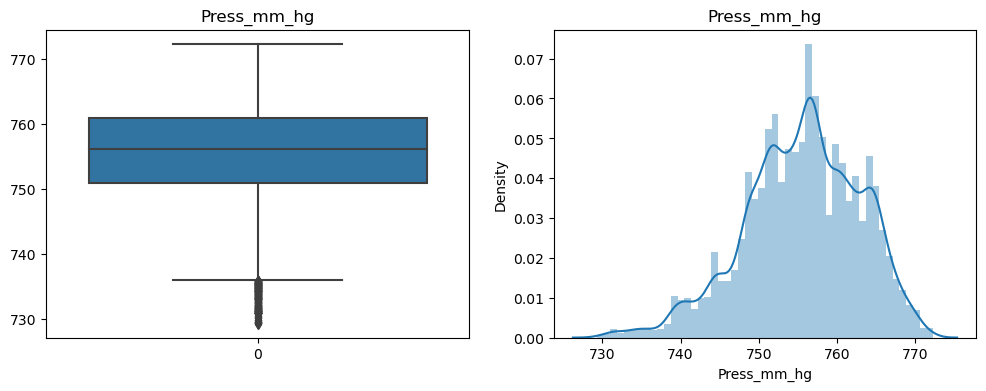

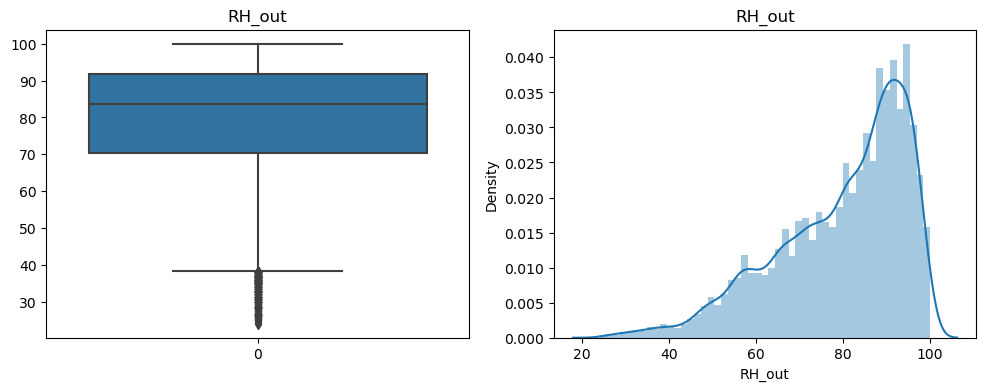

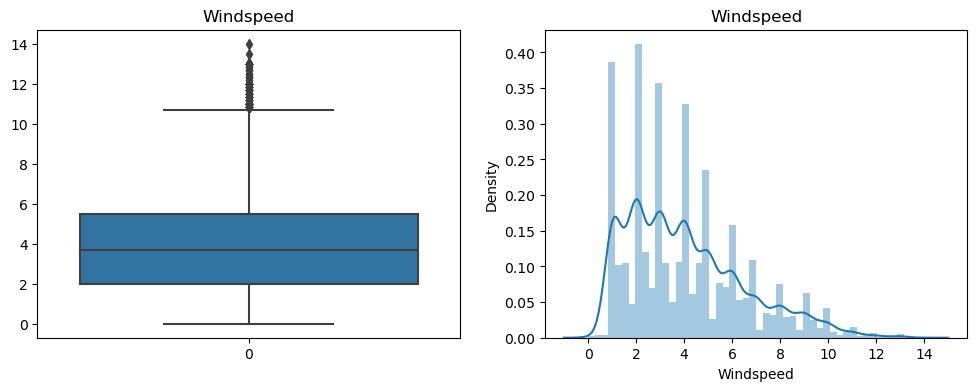

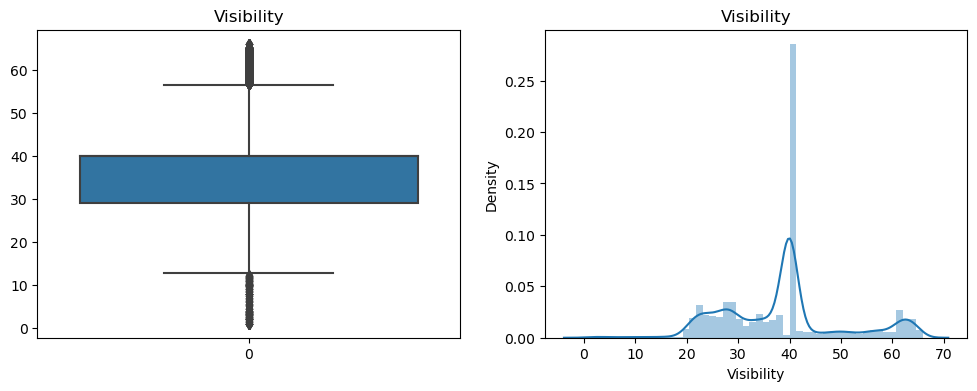

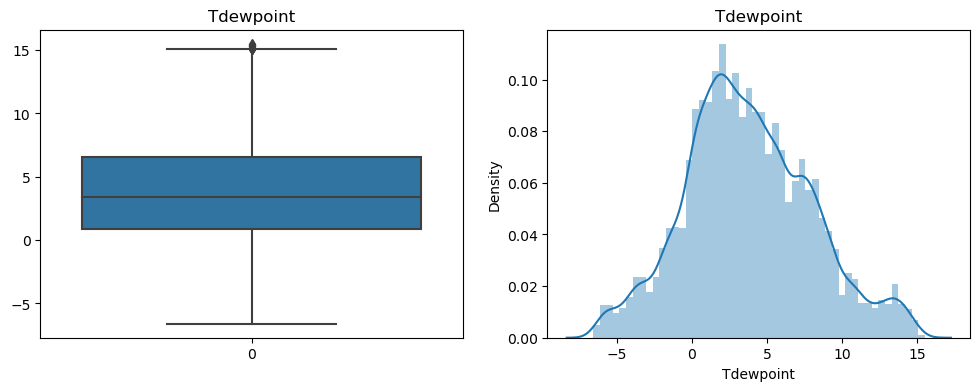

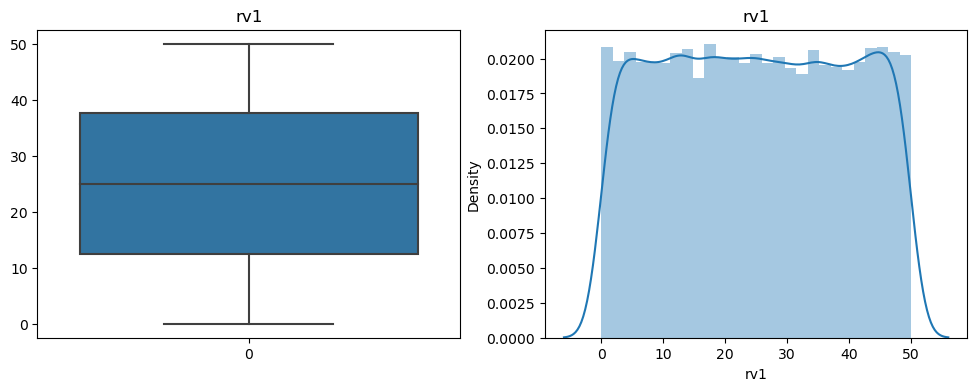

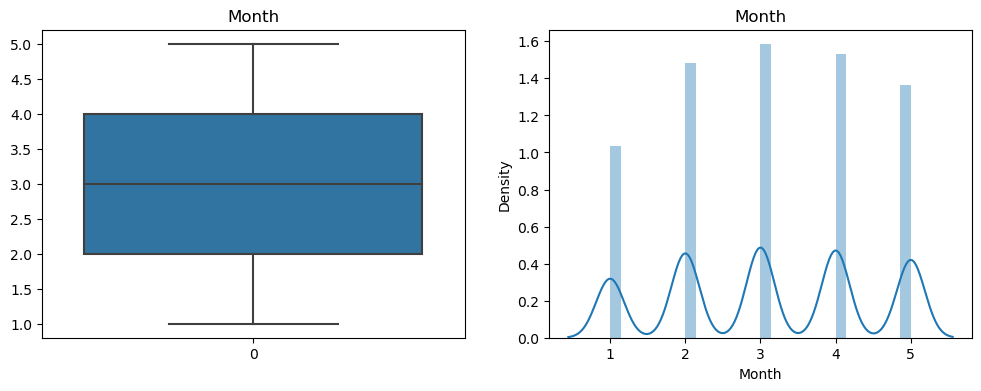

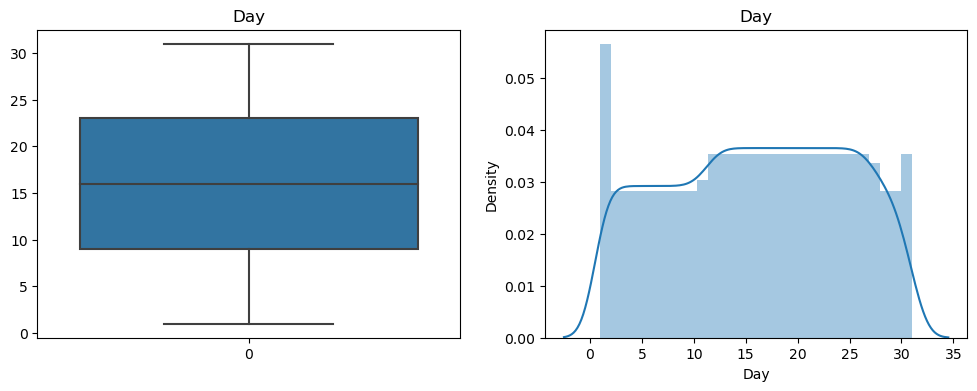

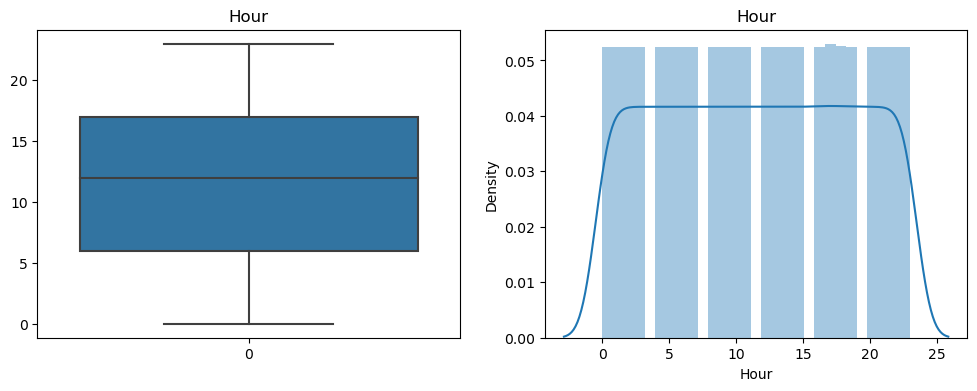

In [103]:
#performing univariate analysis in orginal dataframe df
for col in df.columns:
  #poltting boxplot
    plt.figure(figsize=(12,4))
    plt.subplot(1, 2, 1)
    fig = sns.boxplot(df[col])
    fig.set_title(col)
  #Plotting displot
    plt.subplot(1, 2, 2)
    fig = sns.distplot(df[col])
    fig.set_title(col)
plt.show()

##Conclusion from univariate analysis
###### 1. As per box plot we found that many variables contains outliers
###### 2. Some variable has high skewness.

###  **7.2 Bi-variate analysis**

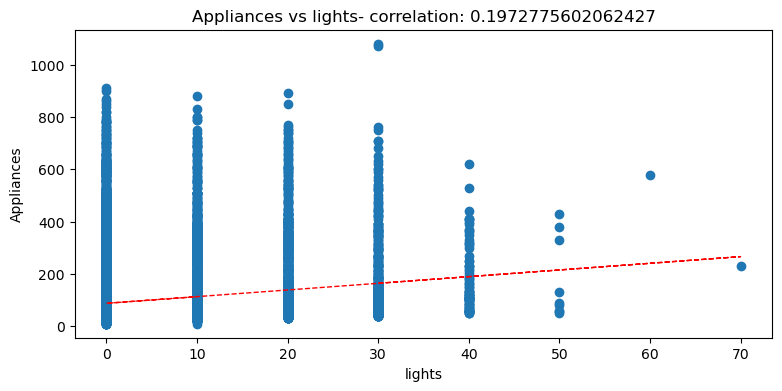

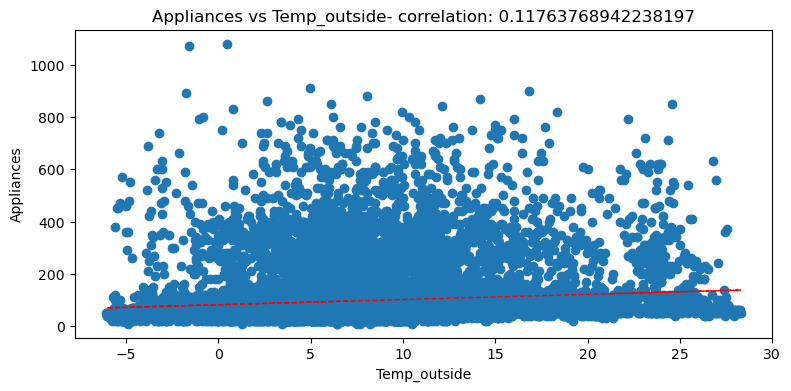

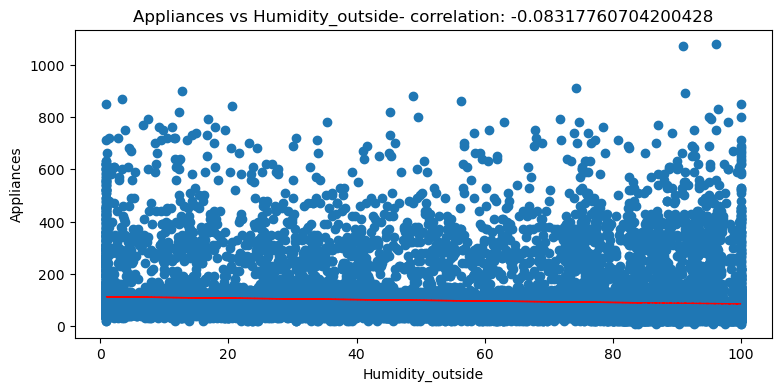

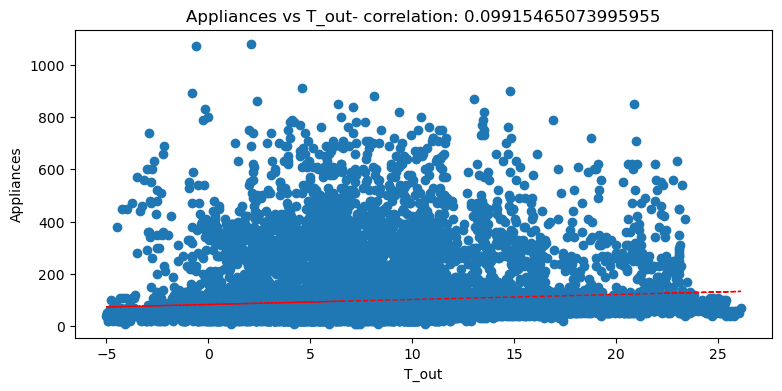

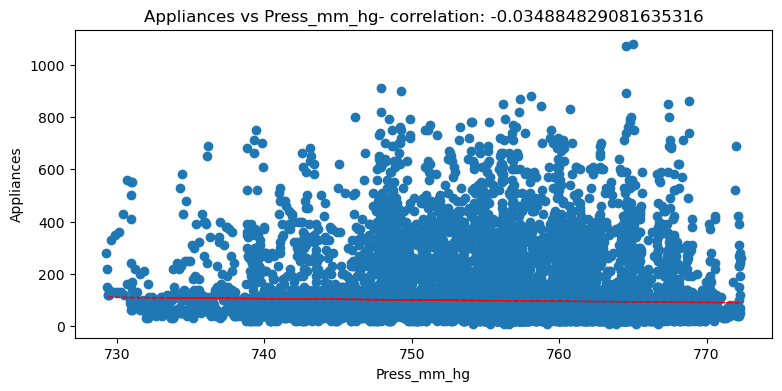

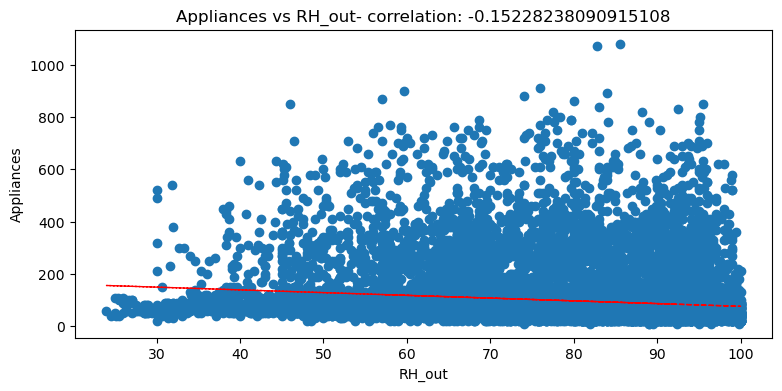

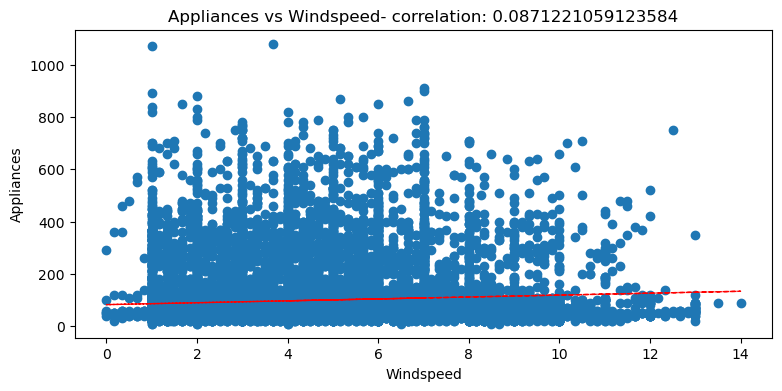

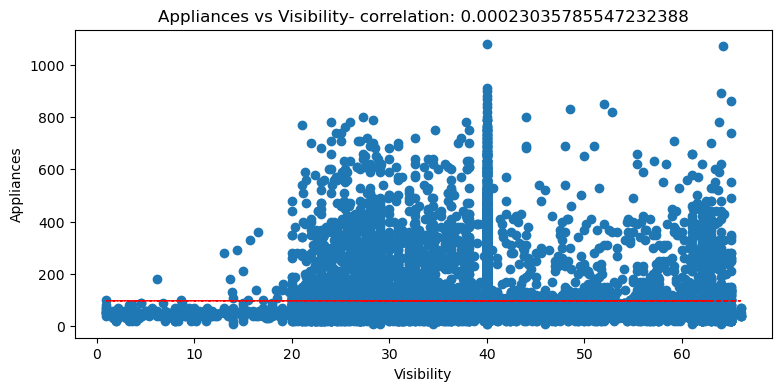

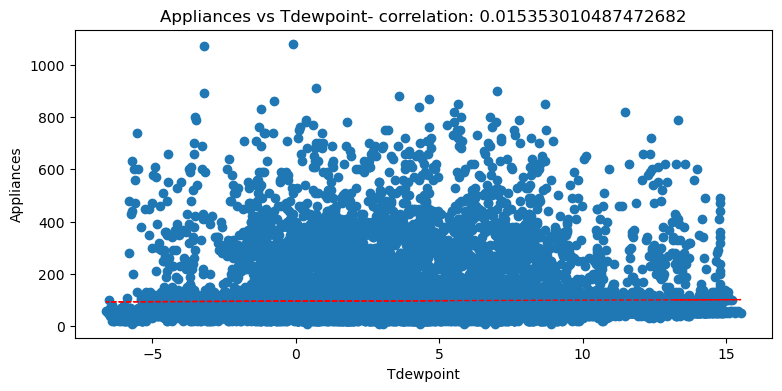

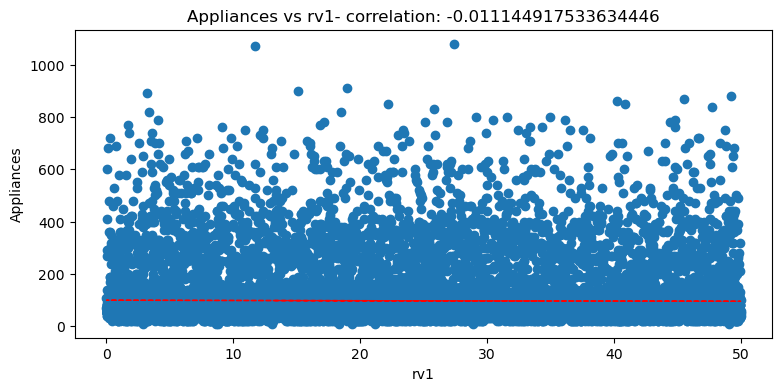

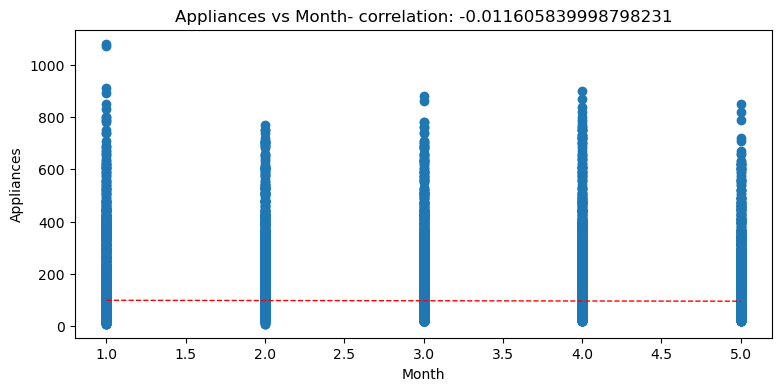

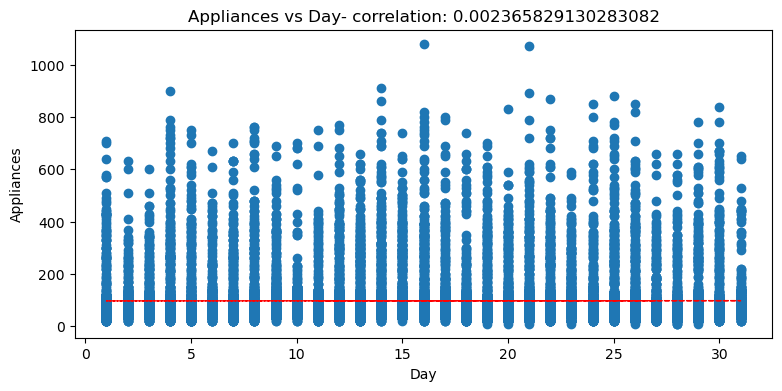

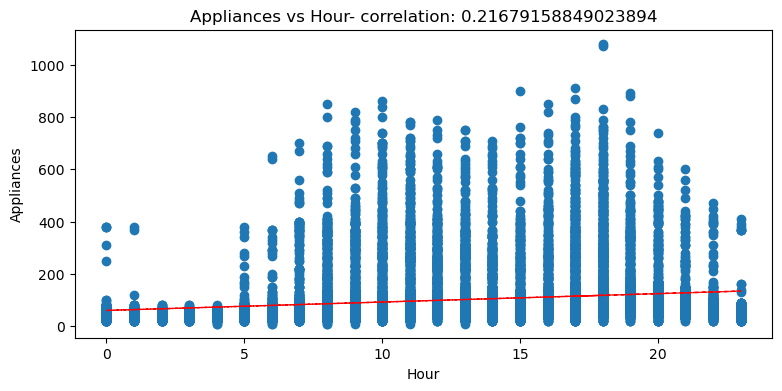

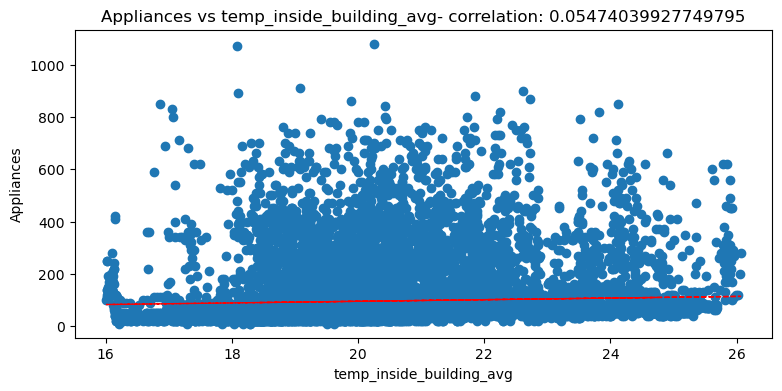

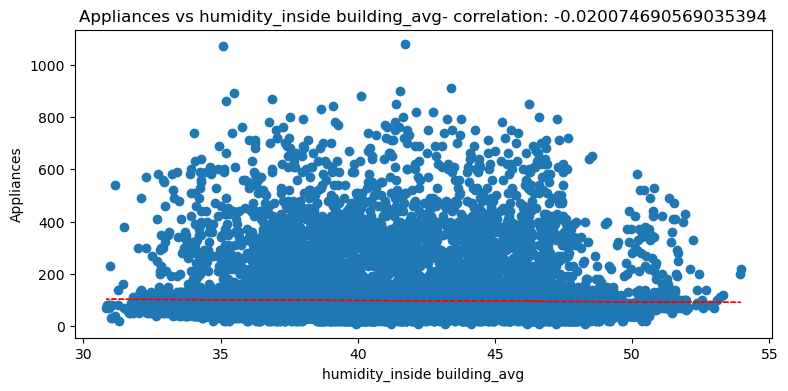

In [104]:
# Cheking Relation Between Dependent and independent variables with correlation for df_avg

for col in df_avg.columns[1:]:
  fig = plt.figure(figsize=(9,4))
  ax = fig.gca()
  feature = df_avg[col]
  label = df_avg['Appliances']

# Correlation Between Features
  correlation = feature.corr(label)

  plt.scatter(x=feature, y=label)
  plt.xlabel(col)
  plt.ylabel('Appliances')

#  Nameing Every plot with correlation between variables
  ax.set_title('Appliances vs ' + col + '- correlation: ' + str(correlation))
  z = np.polyfit(df_avg[col], df_avg['Appliances'], 1)
  y_hat = np.poly1d(z)(df_avg[col])

  plt.plot(df_avg[col], y_hat, "r--", lw=1)

plt.show()

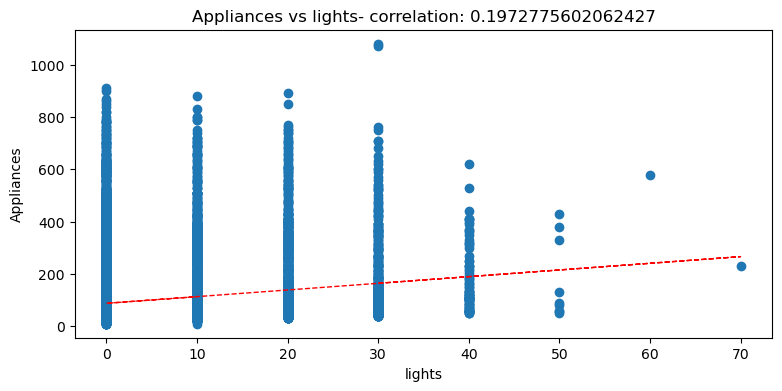

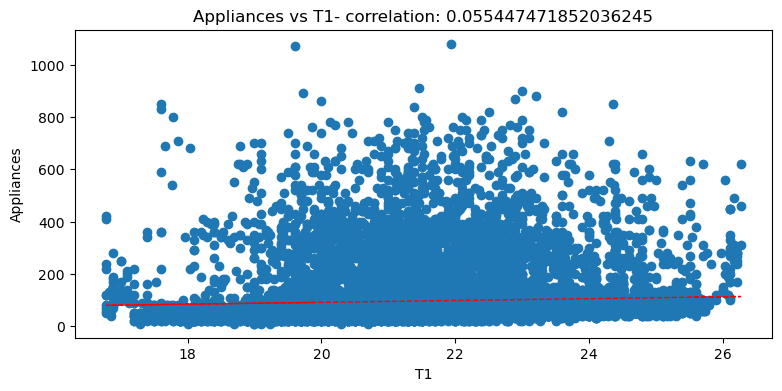

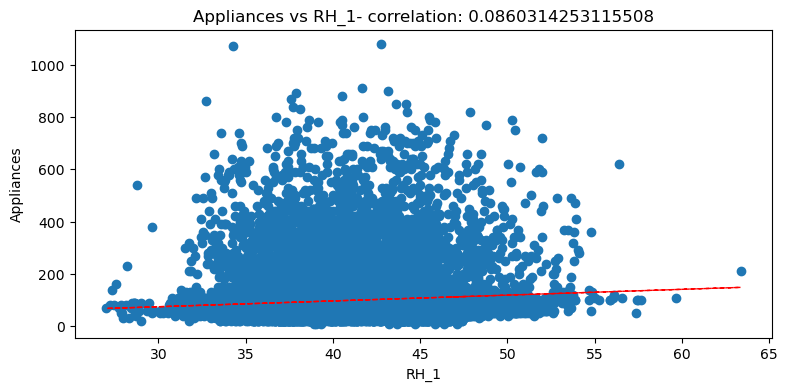

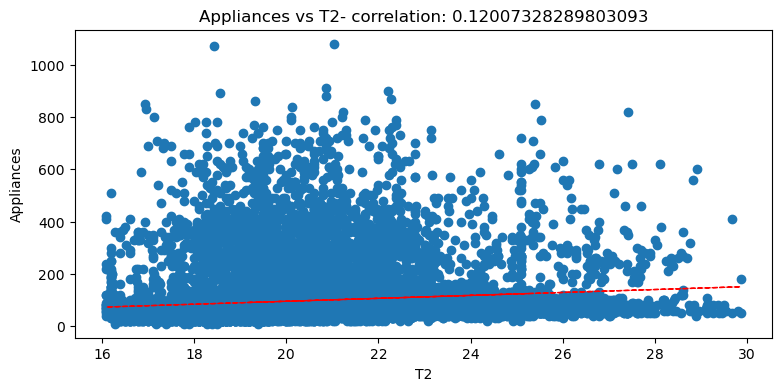

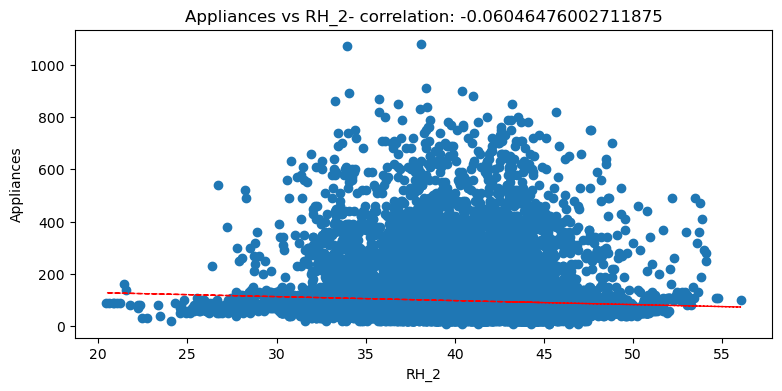

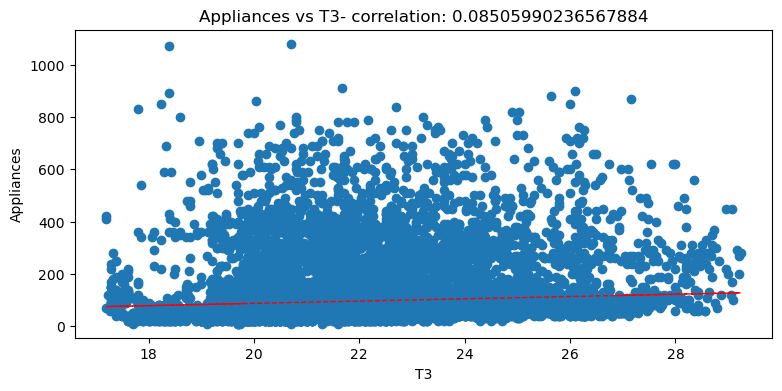

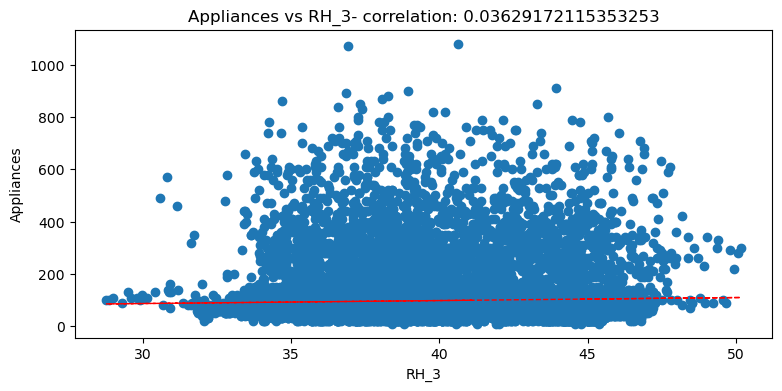

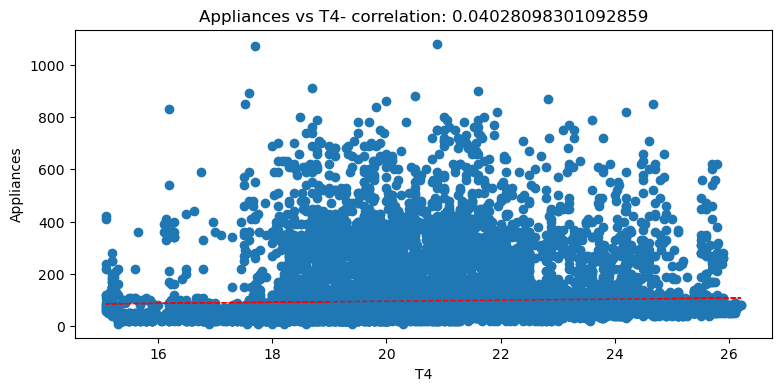

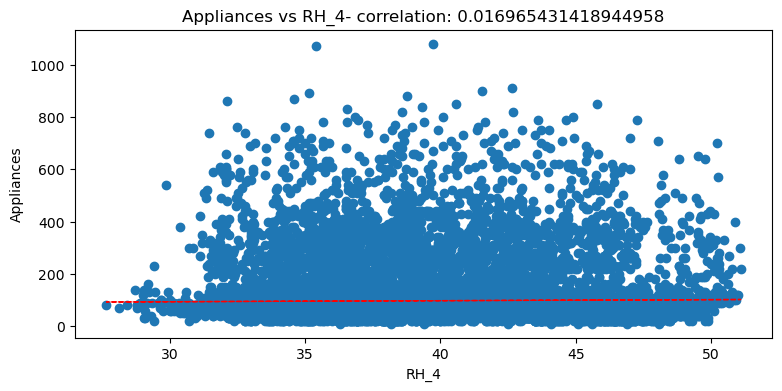

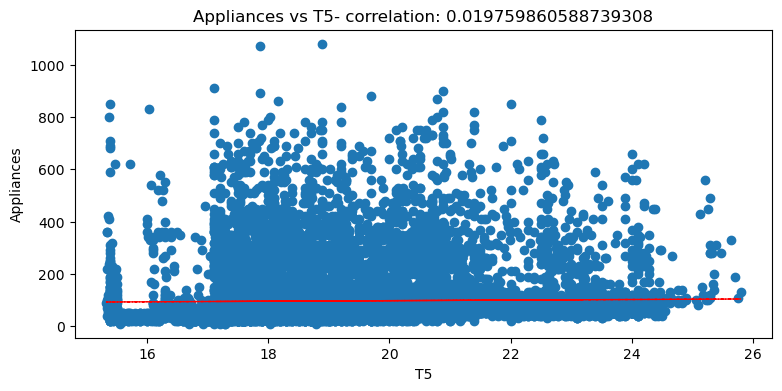

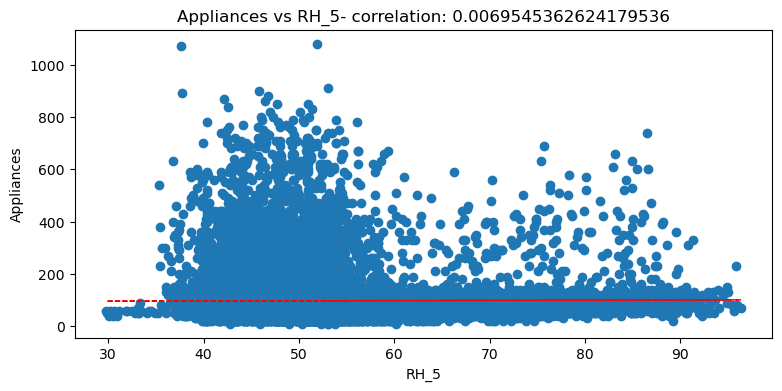

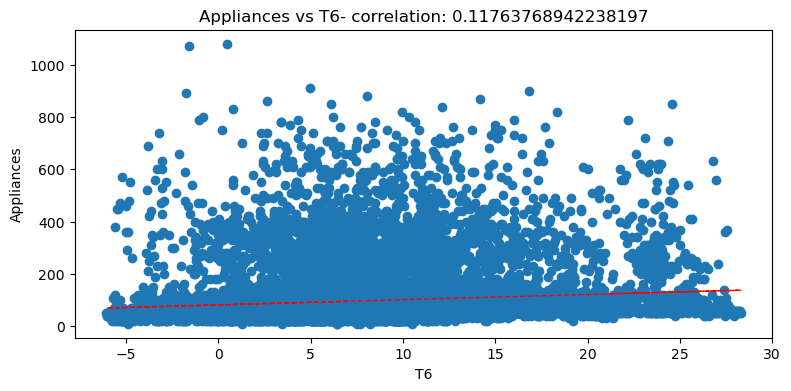

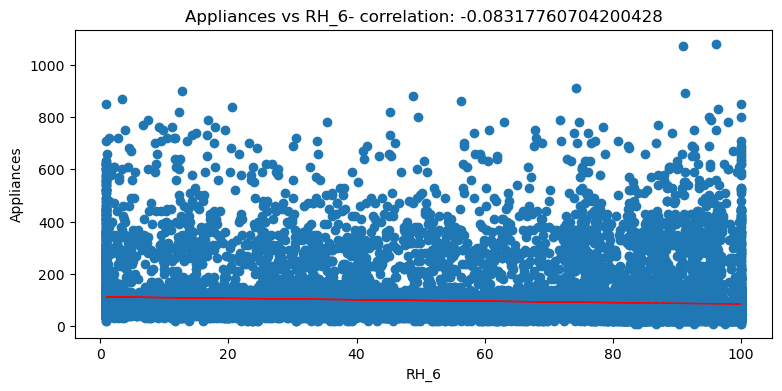

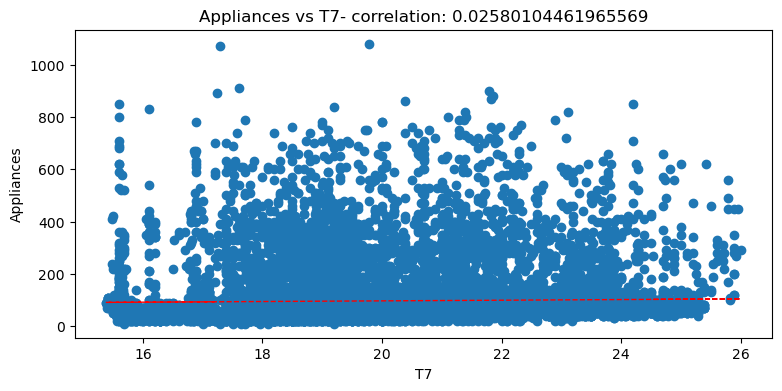

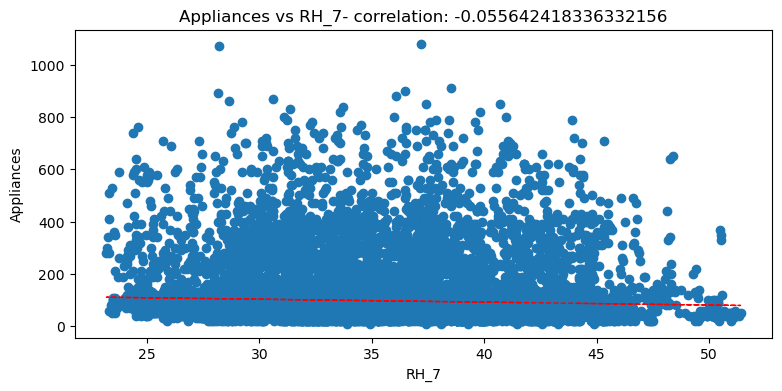

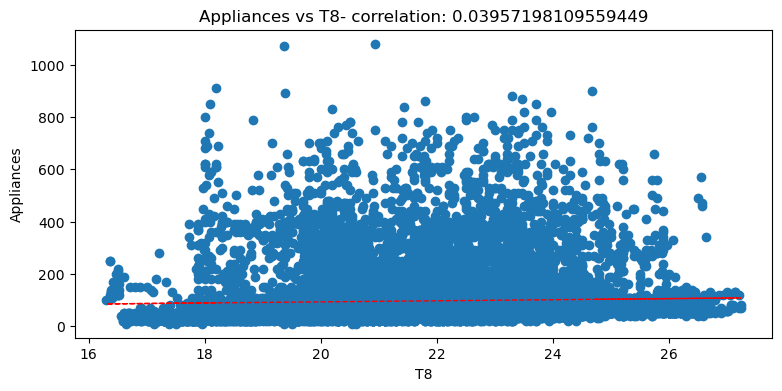

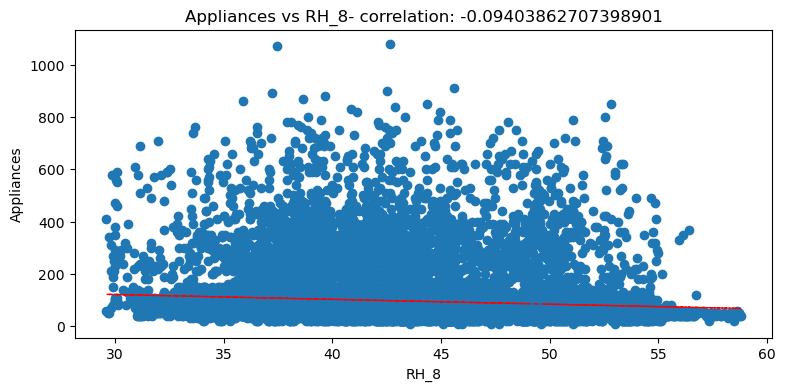

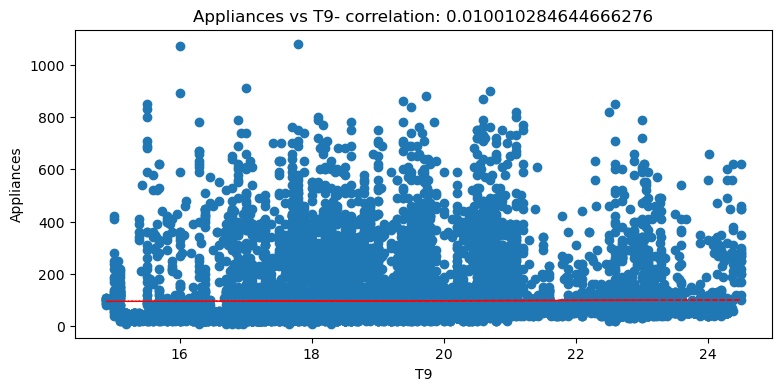

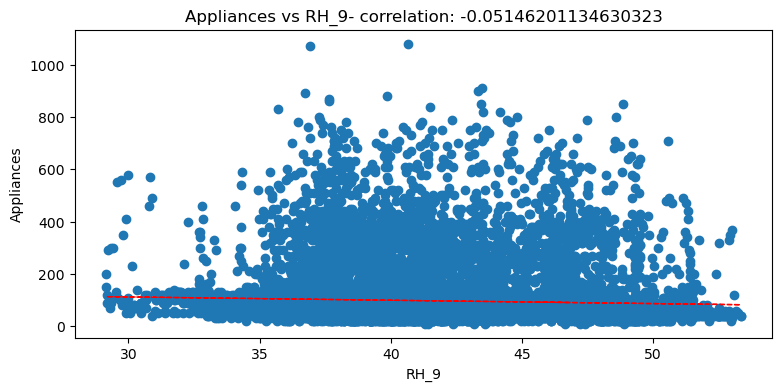

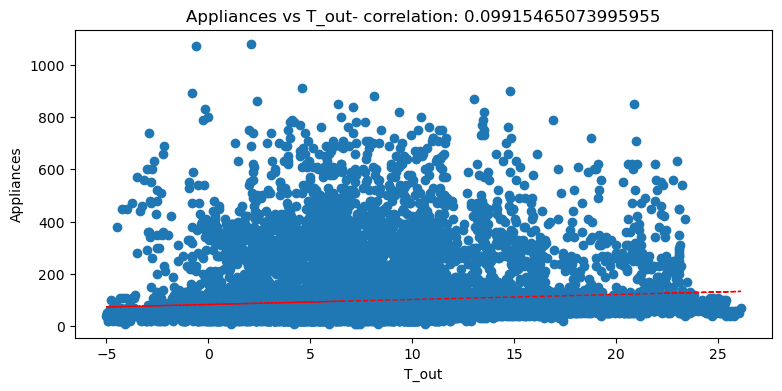

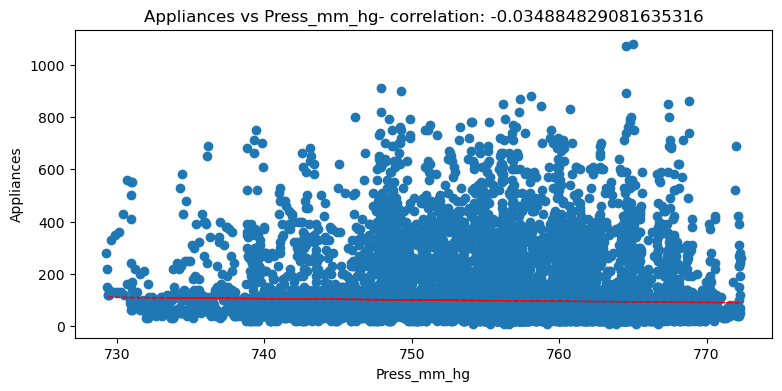

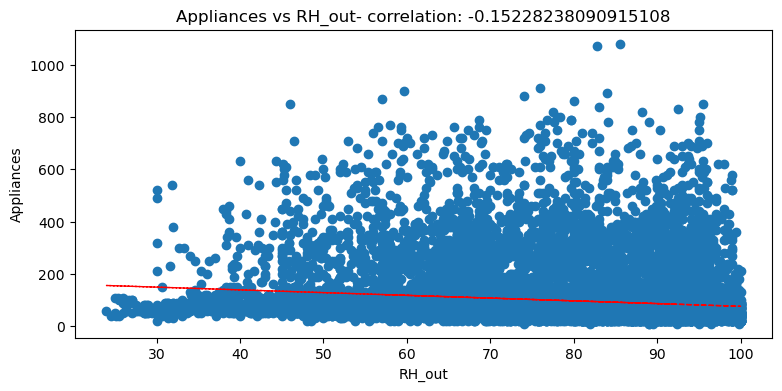

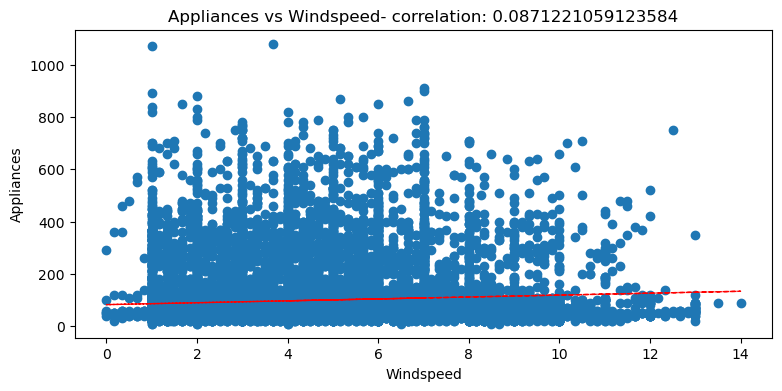

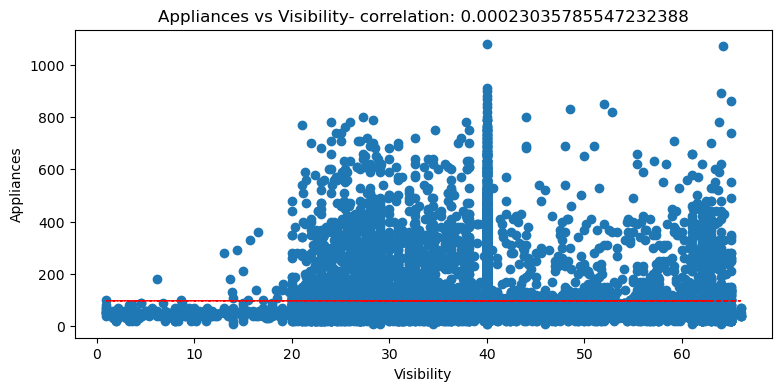

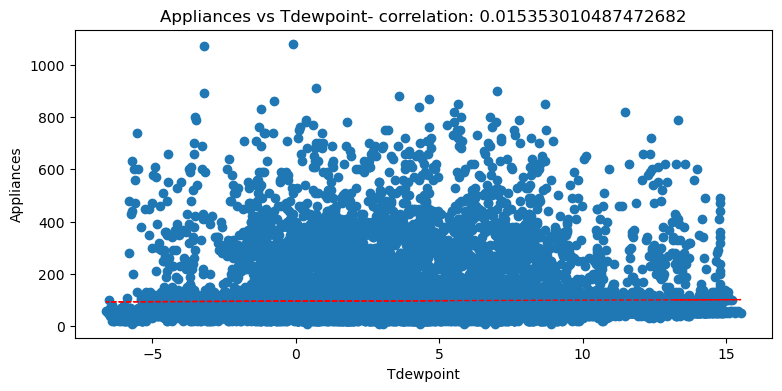

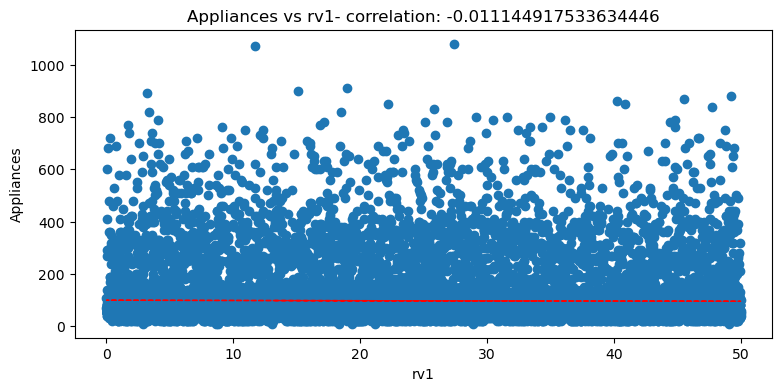

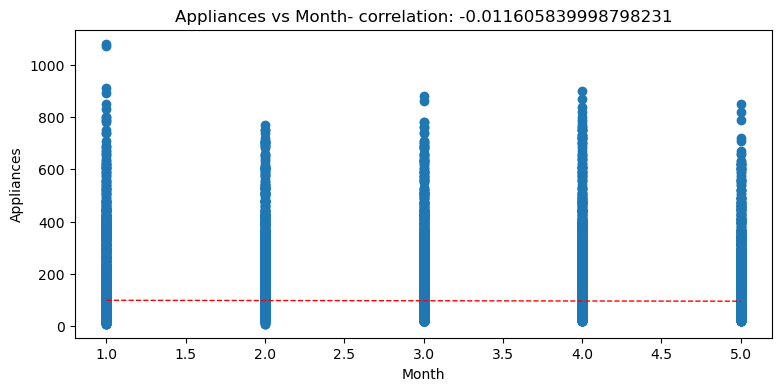

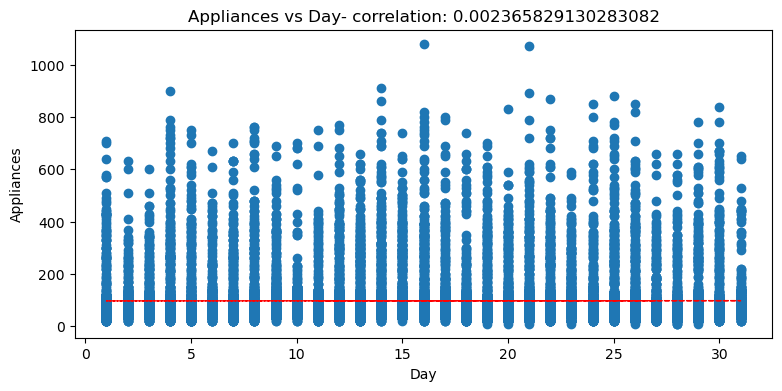

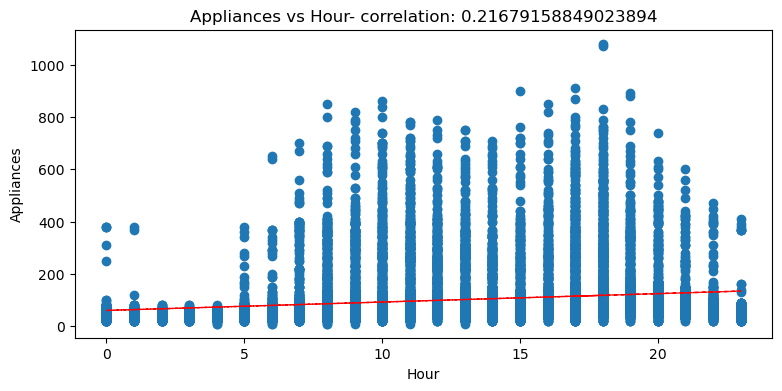

In [105]:
# Cheking Relation Between Dependent and independent variables with correlation for df
for col in df.columns[1:]:
  fig = plt.figure(figsize=(9,4))
  ax = fig.gca()
  feature = df[col]
  label = df['Appliances']

 # Correlation Between Features
  correlation = feature.corr(label)

 # Nameing Every plot with correlation between variables
  plt.scatter(x=feature, y=label)
  plt.xlabel(col)
  plt.ylabel('Appliances')
  ax.set_title('Appliances vs ' + col + '- correlation: ' + str(correlation))
  z = np.polyfit(df[col], df['Appliances'], 1)
  y_hat = np.poly1d(z)(df[col])

  plt.plot(df[col], y_hat, "r--", lw=1)

plt.show()

### Conclusion from Bivariate Analysis
##### 1. Inside room temperatures T1,T2,T3,T4,T5,T7,T8 and T9 (Temp_inside_building_avg for df_avg datframe) has low correlation with appliances
##### 2. Same case also observes with humidity as well, where humidity inside building RH1,RH2,RH3,RH4,RH5,RH7,RH8,RH9 (Humidity_inside_building_avg for df_avg datframe) has low corelation with appliances.
##### 3. Only lights, outside_temp (T6), Humidity outside weather station and Hours has high correlation as compare to other variables


###  **7.3 Multivariate analysis**

<Axes: >

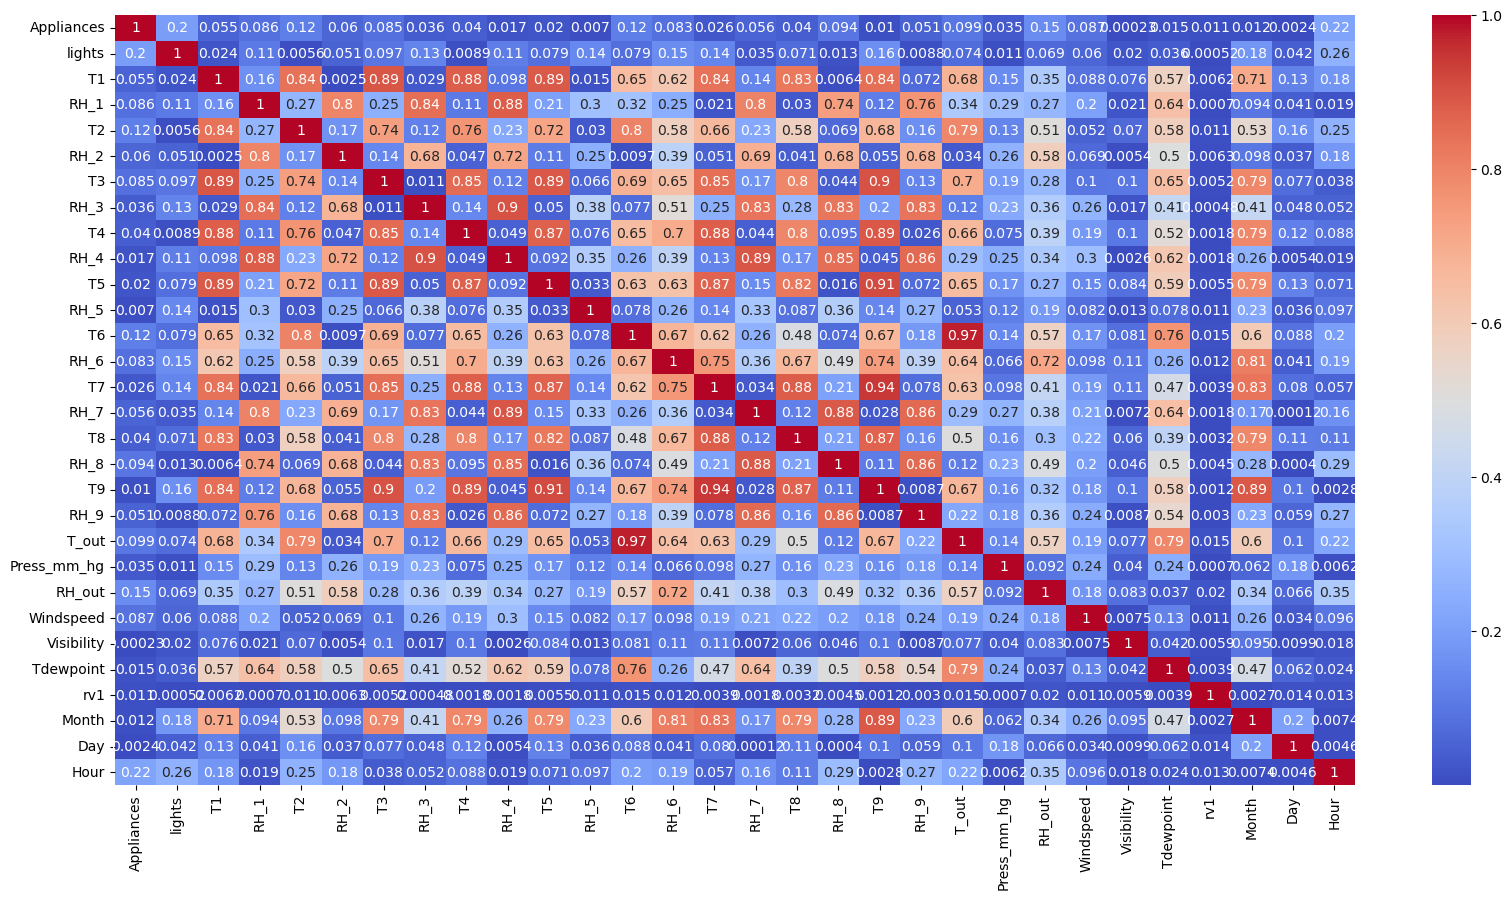

In [106]:
 ## Correlation for df dataframe
plt.figure(figsize=(20,10))
correlation = df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

<Axes: >

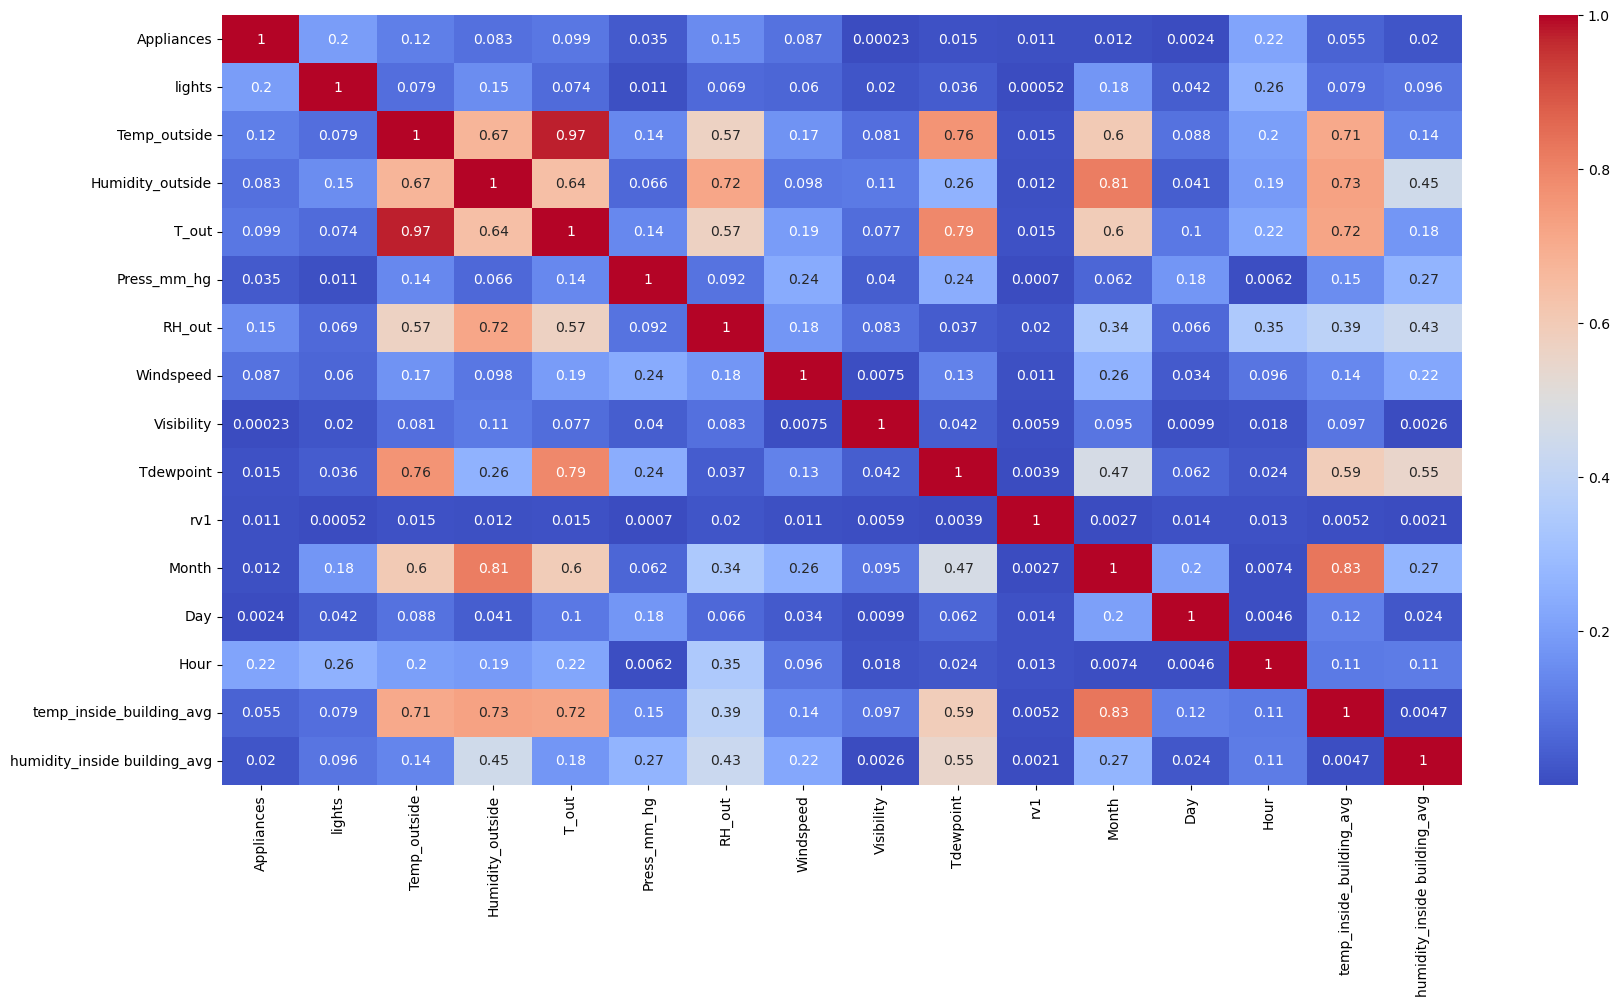

In [107]:
 ## Correlation for df_avg dataframe
plt.figure(figsize=(20,10))
correlation = df_avg.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

In [108]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

### Removing Multi-colinearity in df

In [109]:
#checking multicolinarity for df
calc_vif(df[[i for i in df.describe().columns]])

variables          VIF
0    Appliances     2.295930
1        lights     1.637020
2            T1  3694.412819
3          RH_1  1716.262757
4            T2  2534.479984
5          RH_2  2206.432255
6            T3  1369.853393
7          RH_3  1641.084151
8            T4  1030.456770
9          RH_4  1447.202626
10           T5  1199.235973
11         RH_5    45.987035
12           T6    91.998317
13         RH_6    52.846802
14           T7  1652.124351
15         RH_7   521.061558
16           T8  1007.938634
17         RH_8   650.978234
18           T9  2965.506347
19         RH_9   729.014105
20        T_out   426.957488
21  Press_mm_hg  2237.881878
22       RH_out  1402.322738
23    Windspeed     5.417884
24   Visibility    12.053369
25    Tdewpoint   135.790559
26          rv1     3.976541
27        Month   104.315714
28          Day     7.161681
29         Hour     7.975723

In [110]:
# we are skipping the effect of "T1","T2","T3","T4","T5","T8","T9","RH_1","RH_2","RH_3","RH_4","RH_5","RH_7","RH_8","RH_9" as we aggregated these values in df_avg dataframes.
#And in this dataframe we can use ridge or lasso to reduce impact of these variables
calc_vif(df[[i for i in df.describe().columns if i not in ["T1","T2","T3","T4","T5","T7","T8","T9","RH_1","RH_2","RH_3","RH_4","RH_5","RH_7","RH_8","RH_9"]]]).T

0         1          2          3           4   \
variables  Appliances    lights         T6       RH_6       T_out   
VIF          2.106593  1.428236  64.247469  50.183474  366.498608   

                    5            6          7           8           9   \
variables  Press_mm_hg       RH_out  Windspeed  Visibility   Tdewpoint   
VIF        1492.607248  1294.053305   5.035805    11.78063  115.950364   

                 10         11        12        13  
variables       rv1      Month       Day      Hour  
VIF        3.974052  50.144323  5.749698  4.952665

In [111]:
#removing column
df=df.drop("Press_mm_hg",axis=1)

In [112]:
#checking multicolinarity again
calc_vif(df[[i for i in df.describe().columns  if i not in ["T1","T2","T3","T4","T5","T7","T8","T9","RH_1","RH_2","RH_3","RH_4","RH_5","RH_7","RH_8","RH_9"]]]).T

0         1          2          3          4          5   \
variables  Appliances    lights         T6       RH_6      T_out     RH_out   
VIF          2.102875  1.428226  63.930813  48.559518  97.387675  170.55111   

                  6           7          8         9         10        11  \
variables  Windspeed  Visibility  Tdewpoint       rv1     Month       Day   
VIF         4.867839   11.775936   8.833677  3.969744  49.98754  5.601743   

                12  
variables     Hour  
VIF        4.82688

In [113]:
#RH_out means humidity near weather station and RH_6 means humidity outside building.

df["Mean_outside_Humidity"]=0.5*df["RH_out"]+0.5*df["RH_6"]
df=df.drop(["RH_6","RH_out"],axis=1)

In [114]:
#checking multicolinarity again
calc_vif(df[[i for i in df.describe().columns  if i not in ["T1","T2","T3","T4","T5","T7","T8","T9","RH_1","RH_2","RH_3","RH_4","RH_5","RH_7","RH_8","RH_9"]]]).T

0         1          2          3          4           5   \
variables  Appliances    lights         T6      T_out  Windspeed  Visibility   
VIF          2.101719  1.427871  57.794557  72.958923    4.81129    11.53077   

                  6        7         8         9         10  \
variables  Tdewpoint      rv1     Month       Day      Hour   
VIF           7.2196  3.95178  9.268773  4.445252  4.691938   

                              11  
variables  Mean_outside_Humidity  
VIF                    14.072744

In [115]:
#T-out mean temp outside weather station and T6 means teamp outside building
df["Mean_outside_Temp"]=0.5*df["T_out"]+0.5*df["T6"]
df=df.drop(["T6","T_out"],axis=1)

In [116]:
#checking multicolinarity again
calc_vif(df[[i for i in df.describe().columns  if i not in ["T1","T2","T3","T4","T5","T7","T8","T9","RH_1","RH_2","RH_3","RH_4","RH_5","RH_7","RH_8","RH_9"]]]).T

0         1          2           3          4        5   \
variables  Appliances    lights  Windspeed  Visibility  Tdewpoint      rv1   
VIF          2.087179  1.427334   4.717569   11.511151   6.949558  3.95105   

                 6         7         8                      9   \
variables     Month       Day      Hour  Mean_outside_Humidity   
VIF        9.243877  4.424855  4.575085              14.072629   

                          10  
variables  Mean_outside_Temp  
VIF                18.419773

In [117]:
# as we have in vif fuction, temperature and humidy has high colinear relation that can affect energy usage. And in above result Aggregate_outside_Humidity, Aggregate_outside_Temp has has high multi-colinarity.
#But we can not remove any of them as both are important feature for our output. But we can reduce their effect by using Lasso and Ridge.
calc_vif(df[[i for i in df.describe().columns  if i not in ["T1","T2","T3","T4","T5","T7","T8","T9","RH_1","RH_2","RH_3","RH_4","RH_5","RH_7","RH_8","RH_9","Mean_outside_Humidity","Mean_outside_Temp"]]]).T

0         1          2           3          4         5  \
variables  Appliances    lights  Windspeed  Visibility  Tdewpoint       rv1   
VIF          2.053502  1.390939   3.663294    7.644179   2.459148  3.648963   

                  6         7         8  
variables     Month       Day      Hour  
VIF        6.565359  4.007274  4.025533

## Removing Multi-colinearity in df_avg

In [118]:
#checking multicolinarity for df_avg dataframe
calc_vif(df_avg[[i for i in df_avg.describe().columns]]).T

0         1             2                 3           4   \
variables  Appliances    lights  Temp_outside  Humidity_outside       T_out   
VIF          2.113292  1.440836     64.961202         51.601113  380.825088   

                    5            6          7           8           9   \
variables  Press_mm_hg       RH_out  Windspeed  Visibility   Tdewpoint   
VIF        1879.780347  1312.080923   5.068909   11.838903  122.570136   

                 10         11        12        13                        14  \
variables       rv1      Month       Day      Hour  temp_inside_building_avg   
VIF        3.974344  70.969572  5.957537  5.079675                659.984475   

                                     15  
variables  humidity_inside building_avg  
VIF                          422.132706

In [119]:
#removing column
df_avg=df_avg.drop("Press_mm_hg",axis=1)

In [120]:
#checking multicolinarity again
calc_vif(df_avg[[i for i in df_avg.describe().columns]]).T

0         1             2                 3           4   \
variables  Appliances    lights  Temp_outside  Humidity_outside       T_out   
VIF          2.112677  1.439404     64.941152         49.716052  198.554732   

                  5          6           7          8        9          10  \
variables     RH_out  Windspeed  Visibility  Tdewpoint      rv1      Month   
VIF        501.09418   4.945344   11.812651  30.716923  3.97097  70.784049   

                 11        12                        13  \
variables       Day      Hour  temp_inside_building_avg   
VIF        5.787304  4.953723                632.231708   

                                     14  
variables  humidity_inside building_avg  
VIF                          385.227317

In [121]:
#RH_out means humidity near weather station and RH_6 means humidity outside building

df_avg["Mean_outside_Humidity"]=0.5*df_avg["RH_out"]+0.5*df_avg["Humidity_outside"]
df_avg=df_avg.drop(["Humidity_outside","RH_out"],axis=1)

In [122]:
#checking multicolinarity again
calc_vif(df_avg[[i for i in df_avg.describe().columns]]).T

0         1             2          3          4   \
variables  Appliances    lights  Temp_outside      T_out  Windspeed   
VIF          2.111374  1.437733     58.529477  92.530306     4.9401   

                   5          6         7         8        9         10  \
variables  Visibility  Tdewpoint       rv1     Month      Day      Hour   
VIF         11.594413  15.792193  3.964633  53.45472  5.25968  4.924027   

                                 11                            12  \
variables  temp_inside_building_avg  humidity_inside building_avg   
VIF                      531.529313                    358.135994   

                              13  
variables  Mean_outside_Humidity  
VIF                   105.661407

In [123]:
# as we have seen in vif fuction, temperature and humidy has high colinear relation with each other that can affect energy usage. And in above result temp_inside_Humidity_avg, humidity_inside_building_avg has high multi-colinarity.
#But we can not remove any of them as both are important feature for our output. But we can reduce their effect by using Lasso and Ridge.
calc_vif(df_avg[[i for i in df_avg.describe().columns if i not in ['temp_inside_building_avg',"humidity_inside building_avg"]]]).T

0         1             2          3          4   \
variables  Appliances    lights  Temp_outside      T_out  Windspeed   
VIF          2.101719  1.427871     57.794557  72.958923    4.81129   

                   5          6        7         8         9         10  \
variables  Visibility  Tdewpoint      rv1     Month       Day      Hour   
VIF          11.53077     7.2196  3.95178  9.268773  4.445252  4.691938   

                              11  
variables  Mean_outside_Humidity  
VIF                    14.072744

In [124]:
#T_out means temp outside weather station and Temp_outside means teamp outside building
df_avg["Mean_outside_Temp"]=0.5*df_avg["T_out"]+0.5*df_avg["Temp_outside"]
df_avg=df_avg.drop(["Temp_outside","T_out"],axis=1)

In [125]:
#checking multicolinarity again
calc_vif(df_avg[[i for i in df_avg.describe().columns if i not in ['temp_inside_building_avg',"humidity_inside building_avg"]]]).T

0         1          2           3          4        5   \
variables  Appliances    lights  Windspeed  Visibility  Tdewpoint      rv1   
VIF          2.087179  1.427334   4.717569   11.511151   6.949558  3.95105   

                 6         7         8                      9   \
variables     Month       Day      Hour  Mean_outside_Humidity   
VIF        9.243877  4.424855  4.575085              14.072629   

                          10  
variables  Mean_outside_Temp  
VIF                18.419773

In [126]:
#checking multicolinarity again after excluding two more columns
calc_vif(df_avg[[i for i in df_avg.describe().columns if i not in ['temp_inside_building_avg',"humidity_inside building_avg","Mean_outside_Humidity","Mean_outside_Temp"]]]).T

0         1          2           3          4         5  \
variables  Appliances    lights  Windspeed  Visibility  Tdewpoint       rv1   
VIF          2.053502  1.390939   3.663294    7.644179   2.459148  3.648963   

                  6         7         8  
variables     Month       Day      Hour  
VIF        6.565359  4.007274  4.025533

In [127]:
#droping column
df_avg=df_avg.drop("Visibility",axis=1)

In [128]:
#checking multicolinarity again
calc_vif(df_avg[[i for i in df_avg.describe().columns if i not in ['temp_inside_building_avg',"humidity_inside building_avg","Mean_outside_Humidity","Mean_outside_Temp"]]]).T

0        1          2          3         4         5  \
variables  Appliances   lights  Windspeed  Tdewpoint       rv1     Month   
VIF          2.048859  1.37993   3.364906   2.423115  3.490365  5.466202   

                  6         7  
variables       Day      Hour  
VIF        3.592743  3.962263

# Conclusion from Multivariate Analysis
#### 1. With above method we have either remove unwanted columns or aggregated them to reduce multi-colinarity.
#### 2. But we were not able to drop or aggreagate some variable bcz they maybe very important variables related to our result.
#### 3. But We can reduce these variables effect by using Lasso or Ridge

#8. Handiling Outliers and Skewness

In [129]:
# From Univariate Analysis, we have detected quite a bit of outliers in dataframe, we created a fuction to which returns  list of columns contailning outliers

def list_of_outlier_columns(data):
 # Define the IQR range for outlier
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
 # Blank list
    outlier_columns = []

    for col in data.columns:
     # Find the lower and upper bounds for outlier detection
      lower_limit = Q1[col] - 1.5 * IQR[col]
      upper_limit = Q3[col] + 1.5 * IQR[col]
      if any(data[col] > upper_limit) or any(data[col] < lower_limit):
          outlier_columns.append(col)
    return outlier_columns

In [130]:
#Returing list of variables containing outliers and their aggregate numbers for df dataframe

print(f"For dataframe df list of outliers are {list_of_outlier_columns(df)}")

#printing counts of outliers columns
print(f"The Numbers of columns with ourliers are {len(list_of_outlier_columns(df))} out of {len(df.columns)}")

For dataframe df list of outliers are ['Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'T5', 'RH_5', 'T7', 'RH_7', 'T8', 'RH_8', 'RH_9', 'Windspeed', 'Visibility', 'Tdewpoint', 'Mean_outside_Temp']
The Numbers of columns with ourliers are 20 out of 27


In [131]:
#Returing list of variables containing outliers and their aggregate numbers for df dataframe

print(f"For dataframe df list of outliers are {list_of_outlier_columns(df_avg)}")

#printing counts of outliers columns
print(f"The Numbers of columns with ourliers are {len(list_of_outlier_columns(df_avg))} out of {len(df_avg.columns)}")

For dataframe df list of outliers are ['Appliances', 'lights', 'Windspeed', 'Tdewpoint', 'temp_inside_building_avg', 'humidity_inside building_avg', 'Mean_outside_Temp']
The Numbers of columns with ourliers are 7 out of 12


In [132]:
# Created fuction to find skewness of each variable in dataframe
def skewness_of_df(data):
  skewness_of_columns=[]
  for col in data.columns:
    skewness_of_columns.append(data[col].skew())
  return skewness_of_columns

In [133]:
#skewness of df dataframe
print(skewness_of_df(df))

[3.3863672147430632, 2.1951550406999196, 0.12091711738520292, 0.46577375642231555, 0.8896578498994725, -0.26824717344228066, 0.4507773351008748, 0.46758907995240717, 0.17038405715992935, 0.4446143392062077, 0.5582196988262588, 1.8668200195471256, 0.2547224169425056, 0.24214082895027994, -0.25615113577916404, 0.30803561491175263, 0.3827112390301909, 0.36893704325030624, 0.8599821006227247, 0.4415544617776744, 0.23937407657340345, 0.004944595412162004, -0.06796901264352721, -0.08806825657407569, -0.000673050093866728, -0.5313544551392416, 0.55691375192018]


In [134]:
#skewness of df dataframe
print(skewness_of_df(df_avg))

[3.3863672147430632, 2.1951550406999196, 0.8599821006227247, 0.23937407657340345, 0.004944595412162004, -0.06796901264352721, -0.08806825657407569, -0.000673050093866728, 0.3878652222565874, 0.32793302621899706, -0.5313544551392416, 0.55691375192018]


From above skewness values we can say that we need to perform transformation and normalizatiion

In [135]:
#our data contains negative values at some points.
#We used Yeo-Johnson Transformation,that can handle non positive data as well and it is similar to box-cox transformation

pt = PowerTransformer(method='yeo-johnson')

df_transform = pd.DataFrame(pt.fit_transform(df), columns=df.columns)

df_avg_transform = pd.DataFrame(pt.fit_transform(df_avg), columns=df_avg.columns)

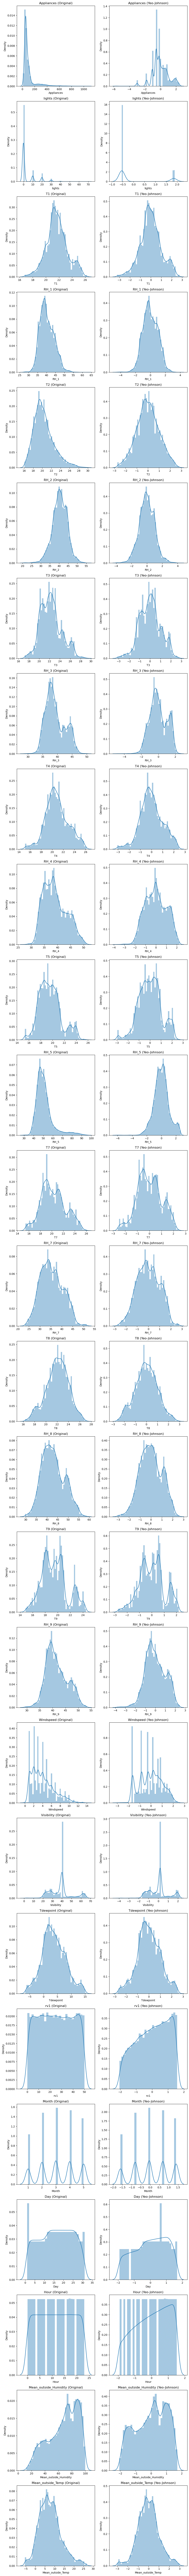

In [136]:
#dataframe with yeon-johnson transformation

df_transform

# Set up the figure
fig, axes = plt.subplots(len(df.columns), 2, figsize=(10, 5*len(df.columns)))

# Plot the distplots for each column in the original and transformed DataFrames
for i, col in enumerate(df.columns):
    sns.distplot(df[col], ax=axes[i, 0])
    axes[i, 0].set_title(f'{col} (Original)')

    sns.distplot(df_transform[col], ax=axes[i, 1])
    axes[i, 1].set_title(f'{col} (Yeo-Johnson)')

plt.tight_layout()
plt.show()

In [137]:
# Calculate the skewness of each column in the original and transformed DataFrames
skewness_of_df = pd.DataFrame({'Original': df.skew(), 'Yeo-Johnson': df_transform.skew()})
skewness_of_df_avg = pd.DataFrame({'Original': df_avg.skew(), 'Yeo-Johnson': df_avg_transform.skew()})
# Display the resulting table
print("Skewness for df dataframe")
print(skewness_of_df)
print("==="*18)
print("Skewness for df_avg dataframe")
print(skewness_of_df_avg)

Skewness for df dataframe
                       Original  Yeo-Johnson
Appliances             3.386367    -0.046212
lights                 2.195155     1.302951
T1                     0.120917     0.002540
RH_1                   0.465774     0.002707
T2                     0.889658     0.017621
RH_2                  -0.268247     0.025705
T3                     0.450777     0.003578
RH_3                   0.467589     0.027706
T4                     0.170384     0.000952
RH_4                   0.444614     0.032063
T5                     0.558220     0.003197
RH_5                   1.866820    -0.053704
T7                     0.254722     0.001657
RH_7                   0.242141    -0.004479
T8                    -0.256151    -0.016142
RH_8                   0.308036     0.003337
T9                     0.382711     0.007446
RH_9                   0.368937     0.005031
Windspeed              0.859982    -0.005854
Visibility             0.441554     0.067784
Tdewpoint              0.2393

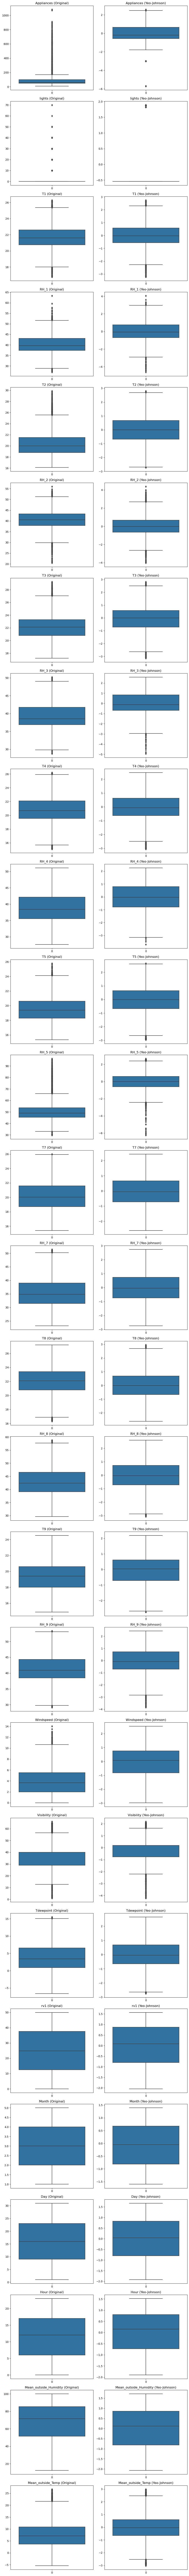

In [138]:
#dataframe with yeon-johnson transformation
df_transform

# Set up the figure
fig, axes = plt.subplots(len(df.columns), 2, figsize=(10, 5*len(df.columns)))

# Plot the distplots for each column in the original and transformed DataFrames
for i, col in enumerate(df.columns):
    sns.boxplot(df[col], ax=axes[i, 0])
    axes[i, 0].set_title(f'{col} (Original)')

    sns.boxplot(df_transform[col], ax=axes[i, 1])
    axes[i, 1].set_title(f'{col} (Yeo-Johnson)')

plt.tight_layout()
plt.show()

In [139]:
#Returing list of variables containing outliers and their aggregate numbers for df dataframe

print(f"For dataframe df_transform list of outliers are {list_of_outlier_columns(df_transform)}")

#returning count of outliers
print(f"The Numbers of columns with ourliers are {len(list_of_outlier_columns(df_transform))} out of {len(df_transform.columns)}")

For dataframe df_transform list of outliers are ['Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T8', 'RH_8', 'T9', 'RH_9', 'Visibility', 'Tdewpoint', 'Mean_outside_Temp']
The Numbers of columns with ourliers are 19 out of 27


In [140]:
#Returing list of variables containing outliers and their aggregate numbers for df_avg dataframe

print(f"For dataframe df_avg_transform list of outliers are {list_of_outlier_columns(df_avg_transform)}")

#returning count of outliers
print(f"The Numbers of columns with ourliers are {len(list_of_outlier_columns(df_avg_transform))} out of {len(df_avg_transform.columns)}")

For dataframe df_avg_transform list of outliers are ['Appliances', 'lights', 'Tdewpoint', 'temp_inside_building_avg', 'humidity_inside building_avg', 'Mean_outside_Temp']
The Numbers of columns with ourliers are 6 out of 12


In [141]:
rt = RobustScaler()

# Apply the robust transformation to the whole dataset df
df_transform_with_robust = pd.DataFrame(rt.fit_transform(df_transform), columns=df_transform.columns)

# Apply the robust transformation to the whole dataset df_avg
df_avg_transform_with_robust = pd.DataFrame(rt.fit_transform(df_avg_transform), columns=df_avg_transform.columns)


In [142]:
skewness_of_df = pd.DataFrame({'Original': df.skew(), 'Yeo-Johnson': df_transform.skew(),'Yeo-Johnson and Robust':df_transform_with_robust.skew()})
skewness_of_df_avg = pd.DataFrame({'Original': df_avg.skew(), 'Yeo-Johnson': df_avg_transform.skew(),'Yeo-Johnson and Robust':df_avg_transform_with_robust.skew()})
# Display the resulting table
print("Skewness for df dataframe")
print(skewness_of_df)
print("==="*18)
print("Skewness for df_avg dataframe")
print(skewness_of_df_avg)

Skewness for df dataframe
                       Original  Yeo-Johnson  Yeo-Johnson and Robust
Appliances             3.386367    -0.046212               -0.046212
lights                 2.195155     1.302951                1.302951
T1                     0.120917     0.002540                0.002540
RH_1                   0.465774     0.002707                0.002707
T2                     0.889658     0.017621                0.017621
RH_2                  -0.268247     0.025705                0.025705
T3                     0.450777     0.003578                0.003578
RH_3                   0.467589     0.027706                0.027706
T4                     0.170384     0.000952                0.000952
RH_4                   0.444614     0.032063                0.032063
T5                     0.558220     0.003197                0.003197
RH_5                   1.866820    -0.053704               -0.053704
T7                     0.254722     0.001657                0.001657
RH_7    

1. We find it odd that skewness of yeo-Johnson and skewness of Yeo-Johnson with robust scaler has exactly same. And it can be only happen when the scaling might be so negligible that it barely affects the variable's distribution and, consequently, its skewness.
2. So we going to confirm it using box plot

In [143]:
#Returing list of variables containing outliers and their aggregate numbers for df_avg dataframe

print(f"For dataframe df_transform_with_robust list of outliers are {list_of_outlier_columns(df_transform_with_robust)}")

print(f"The Numbers of columns with ourliers are {len(list_of_outlier_columns(df_transform_with_robust))} out of {len(df_transform_with_robust.columns)}")

For dataframe df_transform_with_robust list of outliers are ['Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T8', 'RH_8', 'T9', 'RH_9', 'Visibility', 'Tdewpoint', 'Mean_outside_Temp']
The Numbers of columns with ourliers are 19 out of 27


In [144]:
#Returing list of variables containing outliers and their aggregate numbers for df_avg dataframe

print(f"For dataframe df_avg_transform_with_robust list of outliers are {list_of_outlier_columns(df_avg_transform_with_robust)}")

print(f"The Numbers of columns with ourliers are {len(list_of_outlier_columns(df_avg_transform_with_robust))} out of {len(df_avg_transform_with_robust.columns)}")

For dataframe df_avg_transform_with_robust list of outliers are ['Appliances', 'lights', 'Tdewpoint', 'temp_inside_building_avg', 'humidity_inside building_avg', 'Mean_outside_Temp']
The Numbers of columns with ourliers are 6 out of 12


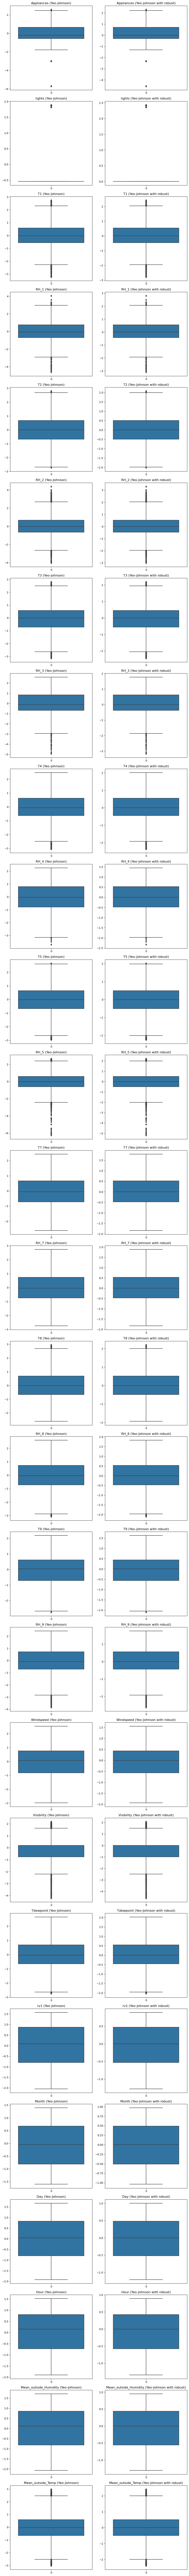

In [145]:
#dataframe with yeon-johnson transformation
df_transform

#dataframe with yeon-johnson and robust
df_transform_with_robust

# Set up the figure
fig, axes = plt.subplots(len(df.columns), 2, figsize=(10, 5*len(df.columns)))

# Plot the distplots for each column in the original and transformed DataFrames
for i, col in enumerate(df_transform.columns):
    sns.boxplot(df_transform[col], ax=axes[i, 0])
    axes[i, 0].set_title(f'{col} (Yeo-Johnson)')

    sns.boxplot(df_transform_with_robust[col], ax=axes[i, 1])
    axes[i, 1].set_title(f'{col} (Yeo-Johnson with robust)')

plt.tight_layout()
plt.show()

1. From above boxplot comparison we found that scaling was so minimal that it has very less effect on skewness as well as outliers.
2. But even though using normalization, scaling was not affected much but it can have significant result on model. That's why we created another two dataframes called df_transform_with_robust and df_avg_transform_with_robust used in above inline.

### Summary Until Now
##### 1.Until now we have created two dataframes called df and df_avg.
##### 2.we perform univariate analysis using boxplot and distplot
##### 3.We perfrom bivariate analysis to find co-relation between each variables
##### 4. We perform multivariate Analysis and remove unwanted variables with high multi-colinearity
##### 5. To control effect of outliers and good distribution we have use Yeon-Johnson Transformation. In process we created two new dataframes df_transform and df_avg_transform
##### 4.And we have compare the result of tranformation on both dataframe df and df_avg using boxplot and distplot.
##### 5.We even compare skewness before and after transformation
##### 6. But still there are outliers in most of the columns do we use Robust transformation which is good with outliers. In this process we created two dataframes again called df_transform_with_robust and df_avg_transform_with_robust.
##### 7. The reason for creating 6 dataframes is to analyze effect of tranformation on model. As sometimes transformation can also has negative results.

#9. Model Implementation

In [146]:
from math import sqrt

def test_models(df, df_name):
    # Define X and y for the dataframe
    variable = "Appliances"
    X = df.iloc[:, df.columns!=variable]
    y = df['Appliances']

    # To apply inverse Yeo-Johnson transformation on y_pred
    pt = PowerTransformer()


    # Split the dataframe into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

    # Define the models
    lists_of_models = [("Linear Regression", LinearRegression()),("Lasso Regression", Lasso()),("Ridge Regression", Ridge()),("Elastic Net Regression", ElasticNet()),("Decision Tree Regression", DecisionTreeRegressor()),("Random Forest Regression", RandomForestRegressor())]


    results = []

    # Train and test each model
    for name, model in lists_of_models:
        # Train the model
        model.fit(X_train, y_train)

        # Make predictions on the testing set
        y_pred = model.predict(X_test)

        # Calculate evaluation metrics
        r2 = r2_score(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        rmse = sqrt(mse)

        # Append the results to the list
        results.append((name, r2, mse, rmse))

    # Create a DataFrame from the results list
    df_results = pd.DataFrame(results, columns=['Model', 'R2 Score', 'MSE', 'RMSE'])

    # Add a column to indicate the name of the dataframe
    df_results['Dataframe'] = df_name

    # Return the results dataframe
    return df_results



In [147]:
# Combine results for all dataframes
df_list = [df, df_avg, df_transform, df_avg_transform, df_transform_with_robust, df_avg_transform_with_robust]
results_list = [test_models(df, df_name) for df, df_name in zip(df_list, ["df", "df_avg", "df_transform", "df_avg_transform", "df_transform_with_robust", "df_avg_transform_with_robust"])]
results_df = pd.concat(results_list, ignore_index=True)

# Print the combined results dataframe
results_df

Model  R2 Score           MSE        RMSE  \
0          Linear Regression  0.150669   9523.170820   97.586735   
1           Lasso Regression  0.147740   9556.016202   97.754878   
2           Ridge Regression  0.150669   9523.170286   97.586732   
3     Elastic Net Regression  0.133953   9710.595105   98.542352   
4   Decision Tree Regression  0.131538   9737.679446   98.679681   
5   Random Forest Regression  0.477209   5861.819693   76.562521   
6          Linear Regression  0.084791  10261.828487  101.300684   
7           Lasso Regression  0.084296  10267.382868  101.328095   
8           Ridge Regression  0.084791  10261.826828  101.300675   
9     Elastic Net Regression  0.083601  10275.168769  101.366507   
10  Decision Tree Regression  0.091988  10181.134943  100.901610   
11  Random Forest Regression  0.467602   5969.537955   77.262785   
12         Linear Regression  0.275947      0.723552    0.850619   
13          Lasso Regression -0.000593      0.999901    0.999950   
14          Ridge Regression  0.275955      0.723544    0.850614   
15    Elastic Net Regression -0.000593      0.999901    0.999950   
16  Decision Tree Regression  0.411362      0.588231    0.766962   
17  Random Forest Regression  0.672112      0.327661    0.572417   
18         Linear Regression  0.214089      0.785367    0.886209   
19          Lasso Regression -0.000593      0.999901    0.999950   
20          Ridge Regression  0.214088      0.785368    0.886210   
21    Elastic Net Regression -0.000593      0.999901    0.999950   
22  Decision Tree Regression  0.370215      0.629349    0.793315   
23  Random Forest Regression  0.654975      0.344787    0.587185   
24         Linear Regression  0.275947      0.495874    0.704183   
25          Lasso Regression -0.000593      0.685265    0.827807   
26          Ridge Regression  0.275964      0.495862    0.704175   
27    Elastic Net Regression -0.000593      0.685265    0.827807   
28  Decision Tree Regression  0.412280      0.402505    0.634433   
29  Random Forest Regression  0.669650      0.226243    0.475650   
30         Linear Regression  0.214089      0.538238    0.733647   
31          Lasso Regression -0.000593      0.685265    0.827807   
32          Ridge Regression  0.214089      0.538238    0.733647   
33    Elastic Net Regression -0.000593      0.685265    0.827807   
34  Decision Tree Regression  0.363154      0.436150    0.660416   
35  Random Forest Regression  0.656931      0.234954    0.484721   

                       Dataframe  
0                             df  
1                             df  
2                             df  
3                             df  
4                             df  
5                             df  
6                         df_avg  
7                         df_avg  
8                         df_avg  
9                         df_avg  
10                        df_avg  
11                        df_avg  
12                  df_transform  
13                  df_transform  
14                  df_transform  
15                  df_transform  
16                  df_transform  
17                  df_transform  
18              df_avg_transform  
19              df_avg_transform  
20              df_avg_transform  
21              df_avg_transform  
22              df_avg_transform  
23              df_avg_transform  
24      df_transform_with_robust  
25      df_transform_with_robust  
26      df_transform_with_robust  
27      df_transform_with_robust  
28      df_transform_with_robust  
29      df_transform_with_robust  
30  df_avg_transform_with_robust  
31  df_avg_transform_with_robust  
32  df_avg_transform_with_robust  
33  df_avg_transform_with_robust  
34  df_avg_transform_with_robust  
35  df_avg_transform_with_robust

In [148]:
#creating fuction to test cross-validation and hypertunning with diffrent model
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
def test_models_with_cv(df, df_name):
    # Define X and y for the dataframe
    variable="Appliances"
    X = df.iloc[:, df.columns!=variable]
    y = df['Appliances']

    # Split the dataframe into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

    # Define the models
    models = [
        ("Ridge Regression", Ridge(), {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}),
        ("Lasso Regression", Lasso(), {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}),
        ("Elastic Net Regression", ElasticNet(), {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100], 'l1_ratio': [0.3,0.4,0.5,0.6,0.7,0.8]}),
        ("Decision Tree Regression", DecisionTreeRegressor(), {'max_depth': [2, 4, 6, 8, 10]}),
        ("Random Forest Regression", RandomForestRegressor(), {'n_estimators': [10, 50, 100], 'max_depth': [2, 4, 6, 8, 10]})
    ]
    results_with_cv = []

    # Train and test each model
    for name, model, param_grid in models:
        # Define GridSearchCV object
        gs = GridSearchCV(model, param_grid, cv=5)

        # Fit GridSearchCV on training set
        gs.fit(X_train, y_train)

        # Get the best model from GridSearchCV
        best_model = gs.best_estimator_

        # Make predictions on the testing set using the best model
        y_pred = best_model.predict(X_test)

        # Calculate evaluation metrics
        r2 = r2_score(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        rmse = sqrt(mse)

        # Append the results to the list
        results_with_cv.append((name, r2, mse, rmse))

    # Create a pandas DataFrame from the results list
    df_results_with_cv = pd.DataFrame(results_with_cv, columns=['Model', 'R2 Score', 'MSE', 'RMSE'])

    # Add a column to indicate the name of the dataframe
    df_results_with_cv['Dataframe'] = df_name

    # Return the results dataframe
    return df_results_with_cv



In [149]:
# Combine results for all dataframes with cross-validation
results_list = [test_models(df, df_name) for df, df_name in zip(df_list, ["df", "df_avg", "df_transform", "df_avg_transform", "df_transform_with_robust", "df_avg_transform_with_robust"])]
results_df_with_cv = pd.concat(results_list, ignore_index=True)

# Print the combined results dataframe
results_df_with_cv

Model  R2 Score           MSE        RMSE  \
0          Linear Regression  0.150669   9523.170820   97.586735   
1           Lasso Regression  0.147740   9556.016202   97.754878   
2           Ridge Regression  0.150669   9523.170286   97.586732   
3     Elastic Net Regression  0.133953   9710.595105   98.542352   
4   Decision Tree Regression  0.128183   9775.291336   98.870073   
5   Random Forest Regression  0.480648   5823.258858   76.310280   
6          Linear Regression  0.084791  10261.828487  101.300684   
7           Lasso Regression  0.084296  10267.382868  101.328095   
8           Ridge Regression  0.084791  10261.826828  101.300675   
9     Elastic Net Regression  0.083601  10275.168769  101.366507   
10  Decision Tree Regression  0.117653   9893.362608   99.465384   
11  Random Forest Regression  0.461884   6033.657911   77.676624   
12         Linear Regression  0.275947      0.723552    0.850619   
13          Lasso Regression -0.000593      0.999901    0.999950   
14          Ridge Regression  0.275955      0.723544    0.850614   
15    Elastic Net Regression -0.000593      0.999901    0.999950   
16  Decision Tree Regression  0.404010      0.595577    0.771736   
17  Random Forest Regression  0.668109      0.331661    0.575901   
18         Linear Regression  0.214089      0.785367    0.886209   
19          Lasso Regression -0.000593      0.999901    0.999950   
20          Ridge Regression  0.214088      0.785368    0.886210   
21    Elastic Net Regression -0.000593      0.999901    0.999950   
22  Decision Tree Regression  0.370247      0.629317    0.793295   
23  Random Forest Regression  0.653025      0.346735    0.588842   
24         Linear Regression  0.275947      0.495874    0.704183   
25          Lasso Regression -0.000593      0.685265    0.827807   
26          Ridge Regression  0.275964      0.495862    0.704175   
27    Elastic Net Regression -0.000593      0.685265    0.827807   
28  Decision Tree Regression  0.414476      0.401001    0.633247   
29  Random Forest Regression  0.670492      0.225667    0.475044   
30         Linear Regression  0.214089      0.538238    0.733647   
31          Lasso Regression -0.000593      0.685265    0.827807   
32          Ridge Regression  0.214089      0.538238    0.733647   
33    Elastic Net Regression -0.000593      0.685265    0.827807   
34  Decision Tree Regression  0.366790      0.433660    0.658528   
35  Random Forest Regression  0.652500      0.237988    0.487840   

                       Dataframe  
0                             df  
1                             df  
2                             df  
3                             df  
4                             df  
5                             df  
6                         df_avg  
7                         df_avg  
8                         df_avg  
9                         df_avg  
10                        df_avg  
11                        df_avg  
12                  df_transform  
13                  df_transform  
14                  df_transform  
15                  df_transform  
16                  df_transform  
17                  df_transform  
18              df_avg_transform  
19              df_avg_transform  
20              df_avg_transform  
21              df_avg_transform  
22              df_avg_transform  
23              df_avg_transform  
24      df_transform_with_robust  
25      df_transform_with_robust  
26      df_transform_with_robust  
27      df_transform_with_robust  
28      df_transform_with_robust  
29      df_transform_with_robust  
30  df_avg_transform_with_robust  
31  df_avg_transform_with_robust  
32  df_avg_transform_with_robust  
33  df_avg_transform_with_robust  
34  df_avg_transform_with_robust  
35  df_avg_transform_with_robust

In [150]:
#adding sting in "Model" Column
results_df_with_cv['Model']=results_df_with_cv['Model']+ " with CV and hypertunnig"

#print results
results_df_with_cv

Model  R2 Score           MSE  \
0          Linear Regression with CV and hypertunnig  0.150669   9523.170820   
1           Lasso Regression with CV and hypertunnig  0.147740   9556.016202   
2           Ridge Regression with CV and hypertunnig  0.150669   9523.170286   
3     Elastic Net Regression with CV and hypertunnig  0.133953   9710.595105   
4   Decision Tree Regression with CV and hypertunnig  0.128183   9775.291336   
5   Random Forest Regression with CV and hypertunnig  0.480648   5823.258858   
6          Linear Regression with CV and hypertunnig  0.084791  10261.828487   
7           Lasso Regression with CV and hypertunnig  0.084296  10267.382868   
8           Ridge Regression with CV and hypertunnig  0.084791  10261.826828   
9     Elastic Net Regression with CV and hypertunnig  0.083601  10275.168769   
10  Decision Tree Regression with CV and hypertunnig  0.117653   9893.362608   
11  Random Forest Regression with CV and hypertunnig  0.461884   6033.657911   
12         Linear Regression with CV and hypertunnig  0.275947      0.723552   
13          Lasso Regression with CV and hypertunnig -0.000593      0.999901   
14          Ridge Regression with CV and hypertunnig  0.275955      0.723544   
15    Elastic Net Regression with CV and hypertunnig -0.000593      0.999901   
16  Decision Tree Regression with CV and hypertunnig  0.404010      0.595577   
17  Random Forest Regression with CV and hypertunnig  0.668109      0.331661   
18         Linear Regression with CV and hypertunnig  0.214089      0.785367   
19          Lasso Regression with CV and hypertunnig -0.000593      0.999901   
20          Ridge Regression with CV and hypertunnig  0.214088      0.785368   
21    Elastic Net Regression with CV and hypertunnig -0.000593      0.999901   
22  Decision Tree Regression with CV and hypertunnig  0.370247      0.629317   
23  Random Forest Regression with CV and hypertunnig  0.653025      0.346735   
24         Linear Regression with CV and hypertunnig  0.275947      0.495874   
25          Lasso Regression with CV and hypertunnig -0.000593      0.685265   
26          Ridge Regression with CV and hypertunnig  0.275964      0.495862   
27    Elastic Net Regression with CV and hypertunnig -0.000593      0.685265   
28  Decision Tree Regression with CV and hypertunnig  0.414476      0.401001   
29  Random Forest Regression with CV and hypertunnig  0.670492      0.225667   
30         Linear Regression with CV and hypertunnig  0.214089      0.538238   
31          Lasso Regression with CV and hypertunnig -0.000593      0.685265   
32          Ridge Regression with CV and hypertunnig  0.214089      0.538238   
33    Elastic Net Regression with CV and hypertunnig -0.000593      0.685265   
34  Decision Tree Regression with CV and hypertunnig  0.366790      0.433660   
35  Random Forest Regression with CV and hypertunnig  0.652500      0.237988   

          RMSE                     Dataframe  
0    97.586735                            df  
1    97.754878                            df  
2    97.586732                            df  
3    98.542352                            df  
4    98.870073                            df  
5    76.310280                            df  
6   101.300684                        df_avg  
7   101.328095                        df_avg  
8   101.300675                        df_avg  
9   101.366507                        df_avg  
10   99.465384                        df_avg  
11   77.676624                        df_avg  
12    0.850619                  df_transform  
13    0.999950                  df_transform  
14    0.850614                  df_transform  
15    0.999950                  df_transform  
16    0.771736                  df_transform  
17    0.575901                  df_transform  
18    0.886209              df_avg_transform  
19    0.999950              df_avg_transform  
20    0.886210              df_avg_transform  
21    0.999950              df_avg_transform  
22   

In [151]:
#creating combined dataframe from both resulted dataframes
combined_mixed_df=pd.concat([results_df,results_df_with_cv])

#sorting dataframe from highest to lowest accuracy
combined_mixed_df=combined_mixed_df.sort_values('R2 Score',ascending=False)

#finding best accurate dataframe
best_accurate_dataframe=combined_mixed_df['Dataframe'].iloc[0]

#finding best model
best_accurate_model=combined_mixed_df['Model'].iloc[0]

#r2_score
r2_score=combined_mixed_df['R2 Score'].iloc[0]

#mean squared error
mse=combined_mixed_df['MSE'].iloc[0]

#Root mean squared error
rmse=combined_mixed_df['RMSE'].iloc[0]

#final conclusion
print(f'{best_accurate_model} model has given highest accuracy for  {best_accurate_dataframe } dataframe with R2 Score: {r2_score}, MSE: {mse} and RMSE of {rmse}')




Random Forest Regression model has given highest accuracy for  df_transform dataframe with R2 Score: 0.6721122700731199, MSE: 0.3276608808829978 and RMSE of 0.5724167021349026


# **10. Conclusion**

### **10.1 Important Features**

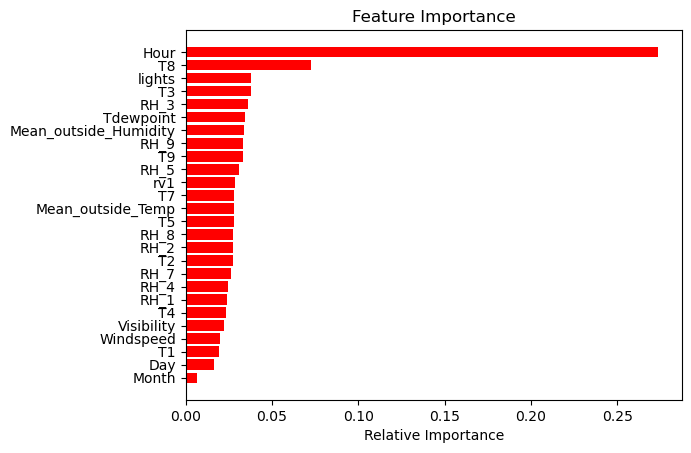

In [152]:
#Ploting important features
# define X and y
X = df_transform_with_robust.drop('Appliances', axis=1)
y = df_transform_with_robust['Appliances']

# train Random Forest model
rf = RandomForestRegressor()
rf.fit(X, y)

# Get the feature importances from the best Random Forest model
important_features= rf.feature_importances_
features= X.columns

indices = np.argsort(important_features)

plt.title('Feature Importance')
plt.barh(range(len(indices)), important_features[indices], color='red', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

### **10.2 Conclusion**

In [153]:
#creating combined dataframe from both resulted dataframes
combined_mixed_df=pd.concat([results_df,results_df_with_cv])

#sorting dataframe from highest to lowest accuracy
combined_mixed_df=combined_mixed_df.sort_values('R2 Score',ascending=False)

#finding best accurate dataframe
best_accurate_dataframe=combined_mixed_df['Dataframe'].iloc[0]

#finding best model
best_accurate_model=combined_mixed_df['Model'].iloc[0]

#r2_score
r2_score=combined_mixed_df['R2 Score'].iloc[0]

#mean squared error
mse=combined_mixed_df['MSE'].iloc[0]

#Root mean squared error
rmse=combined_mixed_df['RMSE'].iloc[0]

#final conclusion
print(f'{best_accurate_model} model has given highest accuracy for  {best_accurate_dataframe } dataframe with R2 Score: {r2_score}, MSE: {mse} and RMSE of {rmse}')

Random Forest Regression model has given highest accuracy for  df_transform dataframe with R2 Score: 0.6721122700731199, MSE: 0.3276608808829978 and RMSE of 0.5724167021349026
